## Programming for Data Analysis Project 2021

![image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQAluz-lUzVGERVLSdJhDb-qJoP0pCbfNmQQQ&usqp=CAU)

##### Problem Statement.

For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose. Specifically, in this project you should:

* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
* Investigate the types of variables involved, their likely distributions, and their relationships with each other.
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

### Table of Contents

1. Introduction
    * This Document
    * RNLI ROS
    * Libraries
    
    
2. Research
    * Find Data
    * Breakdown
        * Station Name
        * Year of Call
        * Launch Time
        * Date of Launch
        * Lifeboats
        * Wind
        * Weather
        * Coordinates       
    
    
3. Constructing
    * Station Name
    * Year of Call
    * Launch Time
    * Date of Launch
    * Lifeboats
    * Wind
    * Weather
    * Coordinates 
    

4. Comparison
    * Station Name
    * Year of Call
    * Launch Time
    * Date of Launch
    * Lifeboats
    * Wind
    * Weather
    * Coordinates 
    

5. Conclusion

6. The Final Dataset


## Introduction

### This Document



#### Topic

###### A look into the Returns of Service of the RNLI Galay Station 2008 - 2020, focusing on location  and weather conditions of callout.

##### Plan of Work

* Import and process data
* Assess incidents per year - replicate and project future numbers
* Time and Day of incidents
* Location of incidents
* Weather and incidents

### RNLI ROS

RNLI return of service is a record of callouts (shouts) performed by all RNLI lifeboats across the UK and Ireland. Information recorded logs the location of callouts, dates and time, lifeboat details, types and outcome of callout, weather and sea conditions.

For this assignment I will analyse this data focused on the weather conditions, time and the locations of Galway Lifeboat callouts since 2008 and look at distributions and trends within the data and try to replicate a dataframe based on research carried out. A full record of RNLI records can be found and the RNLI open data site. [RNLI ROS](https://data-rnli.opendata.arcgis.com/datasets/rnli-returns-of-service/explore)

### Python Libraries

In [1]:
#to import csv files 
import csv

#dataframes
import pandas as pd

#Arrays
import numpy as np

#Plotting
import matplotlib.pyplot as plt

#Fancy plotting
import seaborn as sns

#For time and date management
import datetime

#for generating random numbers
import random

#for plotting windrose
import plotly.express as px

In [2]:
#plot styles
plt.style.use('seaborn')

#default plot size
plt.rcParams['figure.figsize'] = [8, 8]

---
# Research

### Find Data

Using the RNLI open data website, the csv file has been saved to disk and can be imported in as a pandas dataframe.

In [3]:
#Set file to variable
filename = "RNLI_Returns_of_Service.csv"

#Import and store
ros = pd.read_csv(filename, low_memory=False)

In [4]:
ros

X         Y  OBJECTID                                 AIC  \
0      -1.09710  50.69420         1         Motorboating - Other reason   
1      -4.13110  51.21300         2                Hoax and false alarm   
2       0.83840  50.86310         3  Commercial fishing - Other reasons   
3      -4.13110  51.21300         4                Hoax and false alarm   
4      -0.10610  51.50990         5       Waterside activity - On shore   
...         ...       ...       ...                                 ...   
112242 -3.05999  53.79663    112587                               Other   
112243 -7.46940  55.12865    112588                  Person in distress   
112244 -7.46689  55.12502    112589                           Motorboat   
112245 -7.65067  55.34033    112590                           Motorboat   
112246 -7.48063  55.11358    112591                         False alarm   

       LifeboatStationNameProper LaunchTime  YearOfCall LifeboatClass  \
0                      BEMBRIDGE   07:22:00        2016       D CLASS   
1                     ILFRACOMBE   12:28:00        2016       D CLASS   
2                      DUNGENESS   14:10:00        2016       SHANNON   
3                     ILFRACOMBE   13:40:00        2016       SHANNON   
4                          TOWER   00:41:00        2016   E CLASS MK2   
...                          ...        ...         ...           ...   
112242                 BLACKPOOL   01:56:00        2020       D-CLASS   
112243              LOUGH SWILLY   13:29:00        2020   ATLANTIC 85   
112244              LOUGH SWILLY   16:49:00        2020   ATLANTIC 85   
112245              LOUGH SWILLY   11:10:00        2020       SHANNON   
112246              LOUGH SWILLY   13:19:00        2020   ATLANTIC 85   

       LifeboatNumber RoSType  ... VisibilityAtLaunch WindDirectionAtLaunch  \
0               D-778     ILB  ...               GOOD                  90.0   
1               D-717     ILB  ...               GOOD                 135.0   
2              ON1311     ALB  ...               GOOD                 180.0   
3              ON1316     ALB  ...               GOOD                 135.0   
4                E-09     ILB  ...               FAIR                 225.0   
...               ...     ...  ...                ...                   ...   
112242          D-732     ILB  ...               GOOD                 225.0   
112243          B-819     ILB  ...               GOOD                 225.0   
112244          B-819     ILB  ...               GOOD                 225.0   
112245         ON1315     ALB  ...               GOOD                 225.0   
112246          B-819     ILB  ...               GOOD                 225.0   

       SeaConditionsAtLaunch            DateOfLaunch      ROSNumber  \
0                     SMOOTH  2016/01/01 00:00:00+00            NaN   
1                     SLIGHT  2016/01/01 00:00:00+00            NaN   
2                      ROUGH  2016/01/01 00:00:00+00            NaN   
3                     SLIGHT  2016/01/01 00:00:00+00            NaN   
4                     SLIGHT  2016/01/01 00:00:00+00            NaN   
...                      ...                     ...            ...   
112242                SLIGHT  2020/12/28 02:15:00+00  LBI09735/2020   
112243              MOD/CHOP  2020/09/06 13:50:00+00  LBI09736/2020   
112244              MOD/CHOP  2020/09/06 16:49:00+00  LBI09737/2020   
112245              MOD/CHOP  2020/09/15 11:19:59+00  LBI09739/2020   
112246                  CALM  2020/12/01 13:27:00+00  LBI09740/2020   

                                      GlobalID            CreationDate  \
0       {0264C39F-AB7A-4EE7-8380-218B53440C4B}  2020/06/12 15:41:02+00   
1       {9A5260B4-E1F0-4C47-BCA4-218A8310451D}  2020/06/12 15:41:02+00   
2       {9AC98A8D-6DAA-4EDB-B733-B1BEF7EAD3B0}  2020/06/12 15:41:02+00   
3       {08285611-2E74-426C-A607-48335B62155C}  2020/06/12 15:41:02+00   
4       {2ED08289-5568-4C95-BE2F-134E8BE90DA8}  2020/06/12 15:41

This dataframe contains 112247 rows as it covers the whole of the UK and Ireland, as well as 29 columns containing a lot of superfluous data. A quick scan of the dataframe we can decide on which columns are of interest for this project.

### Breakdown

First we can search for all rows containing the string "GALWAY" and save the result to a new dataframe. This has return 411 rows, which is much more manageable and sufficiently large for the requirements.

In [5]:
#Return only Galway
dfros = ros[ros['LifeboatStationNameProper'] == 'GALWAY']

In [6]:
dfros

X         Y  OBJECTID                            AIC  \
367    -9.04170  53.26670       368  Waterside activity - On shore   
368    -8.97000  53.27000       369           Hoax and false alarm   
369    -8.99170  53.23830       370                Person in water   
486    -9.06330  53.25830       487  Waterside activity - On shore   
656    -9.00000  53.25830       657  Waterside activity - On shore   
...         ...       ...       ...                            ...   
111198 -9.05306  53.26796    111543                          Other   
111207 -9.05599  53.27151    111552                    False alarm   
111209 -9.10988  53.23967    111554             Commercial fishing   
112149 -9.08764  53.25546    112494                          Other   
112151 -9.05125  53.26757    112496                          Other   

       LifeboatStationNameProper LaunchTime  YearOfCall LifeboatClass  \
367                       GALWAY   02:47:00        2016   ATLANTIC 85   
368                       GALWAY   14:22:00        2016   ATLANTIC 85   
369                       GALWAY   12:38:00        2016   ATLANTIC 85   
486                       GALWAY   02:40:00        2016   ATLANTIC 85   
656                       GALWAY   12:00:00        2016   ATLANTIC 85   
...                          ...        ...         ...           ...   
111198                    GALWAY   08:59:00        2020   ATLANTIC 85   
111207                    GALWAY   23:39:00        2020   ATLANTIC 85   
111209                    GALWAY   13:46:00        2020   ATLANTIC 85   
112149                    GALWAY   14:42:00        2020   ATLANTIC 85   
112151                    GALWAY   14:24:00        2020   ATLANTIC 85   

       LifeboatNumber RoSType  ... VisibilityAtLaunch WindDirectionAtLaunch  \
367             B-853     ILB  ...               FAIR                 180.0   
368             B-853     ILB  ...               GOOD                 203.0   
369             B-853     ILB  ...               GOOD                 338.0   
486             B-853     ILB  ...               GOOD                   0.0   
656             B-853     ILB  ...               GOOD                 225.0   
...               ...     ...  ...                ...                   ...   
111198          B-810     ILB  ...               GOOD                 225.0   
111207          B-810     ILB  ...               POOR                   0.0   
111209          B-810     ILB  ...               FAIR                 270.0   
112149          B-853     ILB  ...               GOOD                 180.0   
112151          B-853     ILB  ...               GOOD                 225.0   

       SeaConditionsAtLaunch            DateOfLaunch      ROSNumber  \
367                   SLIGHT  2016/01/31 00:00:00+00            NaN   
368                   CHOPPY  2016/01/03 00:00:00+00            NaN   
369                   CHOPPY  2016/01/07 00:00:00+00            NaN   
486                     CALM  2016/02/15 00:00:00+00            NaN   
656                   SMOOTH  2016/01/02 00:00:00+00            NaN   
...                      ...                     ...            ...   
111198                  CALM  2020/09/23 09:10:00+00  LBI08521/2020   
111207                SMOOTH  2020/10/24 23:52:59+00  LBI08530/2020   
111209                 ROUGH  2020/11/02 14:00:00+00  LBI08532/2020   
112149                SLIGHT  2020/11/09 14:50:00+00  LBI09612/2020   
112151              MOD/CHOP  2020/12/20 14:35:00+00  LBI09614/2020   

                                      GlobalID            CreationDate  \
367     {624955E5-E8A1-4826-8CB6-9AFC7F2DB50E}  2020/06/12 15:41:02+00   
368     {1DDE1A09-356C-4CC8-A6CD-3FB294C4DB59}  2020/06/12 15:41:02+00   
369     {5380CBF0-02C1-45F7-B817-6B35965F40B6}  2020/06/12 15:41:02+00   
486     {7BAC4A4E-4E97-4F40-B347-19DB703E5FA5}  2020/06/12 15:41:02+00   
656     {37686FA6-0634-4EEB-856C-106046C1BC67}  2020/06/12 15:41:02+00   
...                                        ...    

The dataframe is mostly complete, with a few missing values, the most concerning is the LifeboatClass column as that is missing a substantial amout of values. This will be looked into below.

In [7]:
#count of all values per column
dfros.count()

X                            406
Y                            406
OBJECTID                     411
AIC                          411
LifeboatStationNameProper    411
LaunchTime                   411
YearOfCall                   411
LifeboatClass                349
LifeboatNumber               411
RoSType                      411
CasualtyCategory             411
CasualtyTypeFull             410
ReasonForLaunch              411
OutcomeOfService             411
Activity                     411
VisibilityAtIncident         411
WeatherAtIncident            411
SeaConditionsAtIncident      406
WeatherAtLaunch              411
VisibilityAtLaunch           411
WindDirectionAtLaunch        401
SeaConditionsAtLaunch        411
DateOfLaunch                 411
ROSNumber                    146
GlobalID                     411
CreationDate                 411
Creator                      377
EditDate                     411
Editor                       377
dtype: int64

AIC stands for Abbreviated Incident Category and is a summary of what the callout involved, this may be an interesting area to look into but for the purposes of this project we will concentrate on wind, weather and location. As well as that there are over 50 unique entries with large portion being unknown, so it does not look like if will be of value to research further.

In [8]:
#Count of unique entries for the AIC column
dfros["AIC"].value_counts()

Hoax and false alarm                                    66
Unknown                                                 60
Person in distress                                      46
Motorboating - Other reason                             25
Waterside activity - On shore                           21
Sailing - Other reason                                  18
Other                                                   17
Walker - Trapped on shore                               12
Angling from boat - Other reason                        11
Other - other                                           10
Swimmers                                                10
Small craft - Kayak and canoeing                        10
Waterside activity - In water                            8
Body                                                     7
Commercial fishing - Other reasons                       7
Sailing - Man overboard                                  6
Sailing - other reason                                  

Outcome of service may be of interest as it contain far fewer unique entries however it probably will not have a large bearing on weather and wind condtions on the shout.

In [9]:
dfros["OutcomeOfService"].value_counts()

Rendered assistance                    157
Others assisted casualty                89
False alarm                             51
Unsuccessful search                     35
Resolved unaided                        34
False Alarm                             15
Stood Down                              12
Hoax call suspected but unconfirmed     12
Hoax call confirmed                      3
No service - lifeboat unsuitable         3
Name: OutcomeOfService, dtype: int64

After a quick overview it was decided to drop the following 13 columns from the dataframe, and we are left with 16 columns.

Only dealing with weather so lets drop all non relevant columns.

* ```X``` - X coordiante will be interesting to plot                        
* ```Y``` - Y coordiante will be interesting to plot                        
* ~OBJECTID~ - Only relevant in reltion to all shouts in UK and Ireland                  
* ~AIC~ - May be interesting but too many cataegories to get decent relationships                         
* ```LifeboatStationNameProper``` - Will all be Galway, can be kept
* ```LaunchTime``` - Will be interesting to see distribution of times               
* ```YearOfCall``` - Will be interesting to see distribution is uniform               
* ```LifeboatClass``` - Should be either Atlantic 75 or 85            
* ```LifeboatNumber``` - Dependent on LifeBoatClass           
* ```RoSType``` - Should all be ILB                  
* ~CasualtyCategory~ - Maybe interesting to see trends but this project will concentrate on weather         
* ~CasualtyTypeFull~ - Maybe interesting to see trends but this project will concentrate on weather         
* ~ReasonForLaunch~  - Maybe interesting to see trends but this project will concentrate on weather          
* ~OutcomeOfService~ - Maybe interesting to see trends but this project will concentrate on weather         
* ~Activity~ - Maybe interesting to see trends but this project will concentrate on weather                 
* ```VisibilityAtIncident``` - Worth investigating     
* ```WeatherAtIncident``` - Worth investigating       
* ```SeaConditionsAtIncident``` - Worth investigating
* ```WeatherAtLaunch``` - Worth investigating          
* ```VisibilityAtLaunch``` - Worth investigating       
* ```WindDirectionAtLaunch``` - Worth investigating    
* ```SeaConditionsAtLaunch``` - Worth investigating    
* ```DateOfLaunch``` - Will be interesting to see potential seasonal distribution            
* ~ROSNumber~ - Clerical data Not needed                
* ~GlobalID~ - Clerical data Not needed                  
* ~CreationDate~ - Clerical data Not needed              
* ~Creator~ - Clerical data Not needed                   
* ~EditDate~ - Clerical data Not needed                  
* ~Editor~ - Clerical data Not needed   

Reorder and take columns of relevance, we now have a more manageable 16 columns.

In [10]:
#create the working dataframe df
df = dfros[['LifeboatStationNameProper','YearOfCall','DateOfLaunch','LaunchTime','LifeboatNumber', 'LifeboatClass',
            'RoSType','WindDirectionAtLaunch', 'WeatherAtLaunch','VisibilityAtLaunch', 'SeaConditionsAtLaunch',
            'WeatherAtIncident', 'VisibilityAtIncident', 'SeaConditionsAtIncident','X', 'Y']]

A more refined count leaves a fairly complete dataframe apart from the column mention above.

In [11]:
df.count()

LifeboatStationNameProper    411
YearOfCall                   411
DateOfLaunch                 411
LaunchTime                   411
LifeboatNumber               411
LifeboatClass                349
RoSType                      411
WindDirectionAtLaunch        401
WeatherAtLaunch              411
VisibilityAtLaunch           411
SeaConditionsAtLaunch        411
WeatherAtIncident            411
VisibilityAtIncident         411
SeaConditionsAtIncident      406
X                            406
Y                            406
dtype: int64

Look for missing data, mainly the large missing data of Lifeboat class

In [12]:
display(df.isnull().sum())

LifeboatStationNameProper     0
YearOfCall                    0
DateOfLaunch                  0
LaunchTime                    0
LifeboatNumber                0
LifeboatClass                62
RoSType                       0
WindDirectionAtLaunch        10
WeatherAtLaunch               0
VisibilityAtLaunch            0
SeaConditionsAtLaunch         0
WeatherAtIncident             0
VisibilityAtIncident          0
SeaConditionsAtIncident       5
X                             5
Y                             5
dtype: int64

We can check to see if lifeboat class and lifeboat number are related and see if it gives any clues as to the missing data. 

In [13]:
#Counts per class
df["LifeboatClass"].value_counts()

ATLANTIC 85    311
ATLANTIC 75     38
Name: LifeboatClass, dtype: int64

Cross reference to completed data in Lifeboat Number, we can see that the are 62 values for Lifeboat B-738, the exact number missing from Lifeboat Class.

In [14]:
df["LifeboatNumber"].value_counts()

B-853    275
B-738     62
B-757     38
B-810     31
B-865      5
Name: LifeboatNumber, dtype: int64

So we can infer that LifeboatNumber B-738 is an Atlantic 75, we can confirm that assumption here [Atlantic 75 boats](https://www.irishlifeboats.com/atlantic-75-class-lifeboats) that was stationed in Galway from 1997 - 2010. 

![image](./images/B-738.png)

A quick check for the shape and the list of columns to see if the dataframe is as we expect.

In [15]:
df.columns

Index(['LifeboatStationNameProper', 'YearOfCall', 'DateOfLaunch', 'LaunchTime',
       'LifeboatNumber', 'LifeboatClass', 'RoSType', 'WindDirectionAtLaunch',
       'WeatherAtLaunch', 'VisibilityAtLaunch', 'SeaConditionsAtLaunch',
       'WeatherAtIncident', 'VisibilityAtIncident', 'SeaConditionsAtIncident',
       'X', 'Y'],
      dtype='object')

In [16]:
df.shape

(411, 16)

---
## Breakdown the dataframe

##### Now we can look into the relevent columns and asses relationships and discern how best to replicate the data.

## Station Name (column1)

All values are equal to "GALWAY" as expected ad the count is correct. This should be easy to replicate.

In [17]:
df["LifeboatStationNameProper"].value_counts()

GALWAY    411
Name: LifeboatStationNameProper, dtype: int64

## Year of Call (column2)

We amy expect this to be of a uniform distribution as an established station, the shouts per year may be steady. Although the data is largely uniform there are a couple of spikes in 2016 and 2019 which were exceptionally busy years.

In [18]:
#Dat counts per year
df["YearOfCall"].value_counts()

2019    66
2016    48
2020    34
2014    33
2013    31
2011    28
2008    27
2017    26
2009    26
2012    25
2010    24
2015    23
2018    20
Name: YearOfCall, dtype: int64

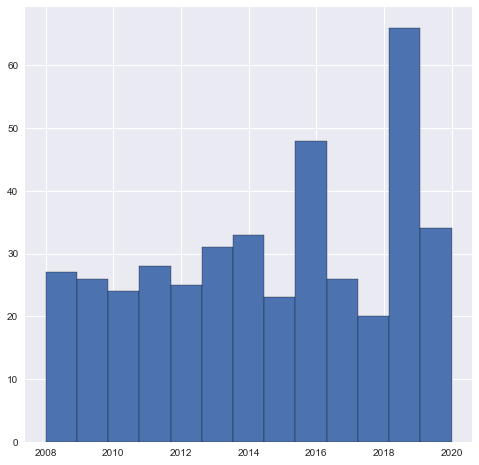

In [19]:
ax = plt.axes()
plt.hist(df["YearOfCall"],ec = "black",bins=13)
plt.show()

---
## Launch Time (column3)

Launch times may also have a normal distribution centred around the busiest times, lets see where that is. Launch times in itself are not that useful as there are 303/411 unique values, we need to look at it in groups.

In [20]:
#counts per Launch time
df["LaunchTime"].value_counts()

17:00:00    5
16:00:00    5
23:05:00    4
23:06:00    4
14:00:00    4
           ..
13:00:00    1
13:36:00    1
15:19:00    1
03:00:00    1
18:52:00    1
Name: LaunchTime, Length: 303, dtype: int64

We can see below that the time needs to be converted from a string to time format.

In [21]:
df.dtypes

LifeboatStationNameProper     object
YearOfCall                     int64
DateOfLaunch                  object
LaunchTime                    object
LifeboatNumber                object
LifeboatClass                 object
RoSType                       object
WindDirectionAtLaunch        float64
WeatherAtLaunch               object
VisibilityAtLaunch            object
SeaConditionsAtLaunch         object
WeatherAtIncident             object
VisibilityAtIncident          object
SeaConditionsAtIncident       object
X                            float64
Y                            float64
dtype: object

Next we can group the time per hour to look for a distribution throughout the day.

In [22]:
#create a temp df
ltime = pd.DataFrame()
#convert to datetime
ltime['LaunchTime'] = pd.to_datetime(df['LaunchTime'], infer_datetime_format=True)

#group by hour and count
ltime['LaunchTime'].groupby(ltime.LaunchTime.dt.to_period("H")).agg('count')

LaunchTime
2022-01-03 00:00     4
2022-01-03 01:00     5
2022-01-03 02:00    12
2022-01-03 03:00     6
2022-01-03 04:00     9
2022-01-03 05:00     7
2022-01-03 06:00     3
2022-01-03 07:00     4
2022-01-03 08:00     9
2022-01-03 09:00    12
2022-01-03 10:00     9
2022-01-03 11:00    17
2022-01-03 12:00    24
2022-01-03 13:00    25
2022-01-03 14:00    26
2022-01-03 15:00    31
2022-01-03 16:00    45
2022-01-03 17:00    24
2022-01-03 18:00    37
2022-01-03 19:00    24
2022-01-03 20:00    31
2022-01-03 21:00    17
2022-01-03 22:00     9
2022-01-03 23:00    21
Freq: H, Name: LaunchTime, dtype: int64

We can see there is a normal distribution of the Launch Times centred around 4pm.

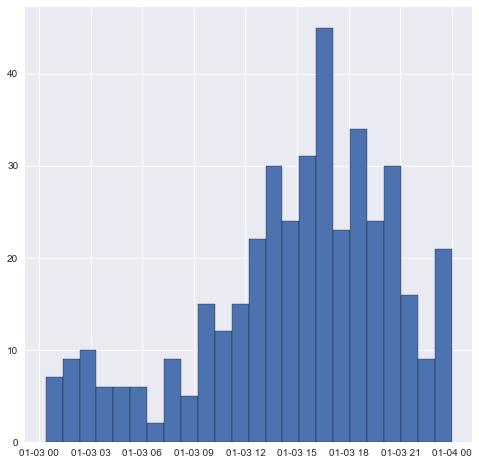

In [23]:
ax = plt.axes()
plt.hist(ltime["LaunchTime"], ec = "black", bins = 24)
plt.show()

---
## Date of Launch (column4)

We have a distribution of Year and time already so we can look at the date of launch in terms of month and look for distributions.

In [24]:
#temp df
m = pd.DataFrame()
#convert to datetime
m['DateOfLaunch'] = pd.to_datetime(df['DateOfLaunch'], infer_datetime_format=True)
#group by month and count
month = df.groupby(m["DateOfLaunch"].dt.month).count()
month["DateOfLaunch"]

DateOfLaunch
1     28
2     23
3     33
4     32
5     39
6     57
7     48
8     47
9     35
10    31
11    18
12    20
Name: DateOfLaunch, dtype: int64

In [25]:
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
count = [28,23,33,32,39,57,48,47,35,31,18,20]

We can see that the data is normally distributed to the summer months centred around June. This is interesing as you may expect lifeboat callouts to peak during rough weather. However as Galway lifeboat station only operates within Galway Bay and only operates with inshore Lifeboats (Atlantic 75/85) we may find that the nicer weather increases the chances swimmers, walkers and pleasure boaters may get themselves into trouble on the water.

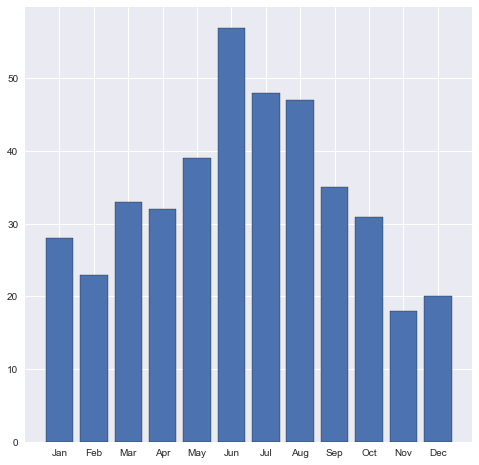

In [26]:
ax = plt.axes()
plt.bar(month,count, ec = "black")
plt.show()

---
## Lifeboats (column5,6,7)

The next 3 columns are all related to the lifeboat type, so they can be researched together. Galway only operates with inshore Lifeboats(ILB) as opposed to the larger All-Weather lifeboats (ALB) that work the outer bay based on the Arran Islands.

In [27]:
#count per boat class
df["LifeboatClass"].value_counts()

ATLANTIC 85    311
ATLANTIC 75     38
Name: LifeboatClass, dtype: int64

In [28]:
#count per boat number
df["LifeboatNumber"].value_counts()

B-853    275
B-738     62
B-757     38
B-810     31
B-865      5
Name: LifeboatNumber, dtype: int64

In [29]:
#type of boat
df["RoSType"].value_counts()

ILB    411
Name: RoSType, dtype: int64

By grouping by year we can see when there has been a change of boat at the station, there have only been 5 different boats of 2 classes over the years. This will be helpful to generate the lifeboat class based on the time of shout rather than randomly generating these columns.

In [30]:
df.groupby(['YearOfCall', 'LifeboatClass', 'LifeboatNumber','RoSType']).size().reset_index(name='counts')

YearOfCall LifeboatClass LifeboatNumber RoSType  counts
0         2010   ATLANTIC 75          B-757     ILB      15
1         2011   ATLANTIC 75          B-757     ILB      23
2         2011   ATLANTIC 85          B-853     ILB       5
3         2012   ATLANTIC 85          B-853     ILB      25
4         2013   ATLANTIC 85          B-853     ILB      31
5         2014   ATLANTIC 85          B-853     ILB      33
6         2015   ATLANTIC 85          B-853     ILB      18
7         2015   ATLANTIC 85          B-865     ILB       5
8         2016   ATLANTIC 85          B-853     ILB      48
9         2017   ATLANTIC 85          B-853     ILB      26
10        2018   ATLANTIC 85          B-853     ILB      20
11        2019   ATLANTIC 85          B-853     ILB      66
12        2020   ATLANTIC 85          B-810     ILB      31
13        2020   ATLANTIC 85          B-853     ILB       3

We know from the above research the Atlantic 75 (B-738) was the stations boat from 1997 - 2010. The Atlantic 85 (B-853) is the current boat from 2011 onwards with brief stints of replacement boats when the main boat is due for maintainence.

---
## Wind (column8)

Lets look at average wind direction per shout. This will most likely peak around Westerly and South Westerly winds as we are in the West of Ireland and that is the predominant wind directions, verified here [Galway Wind](https://www.meteoblue.com/en/weather/historyclimate/climatemodelled/galway_ireland_2964180)

![image](./images/windrose.png)

In [31]:
#count of wind direction in degrees
df["WindDirectionAtLaunch"].value_counts()

225.0    104
270.0     77
135.0     41
180.0     36
0.0       34
315.0     33
90.0      27
45.0      17
248.0     11
203.0      8
293.0      3
158.0      3
338.0      3
113.0      2
23.0       2
Name: WindDirectionAtLaunch, dtype: int64

15 of the 16 cardinal points are present, with the highest values at 270 and 225 degrees, or W and SW.

Text(0.5, 0, 'Wind Direction At Launch')

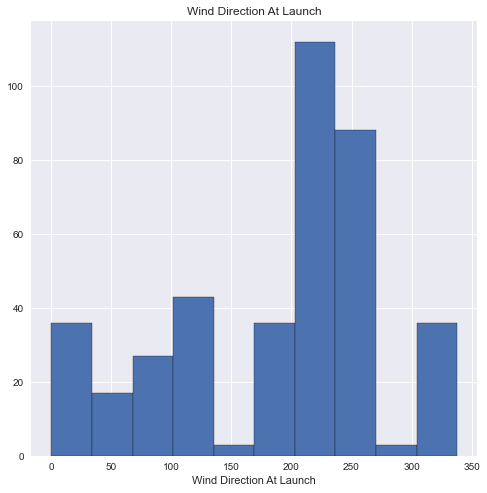

In [32]:
#plot of wind direction
plt.hist(df["WindDirectionAtLaunch"], ec = "black")
plt.title("Wind Direction At Launch")
plt.xlabel("Wind Direction At Launch")

Strong trend of Westerly and South Westerly winds, lets see if we can recreate our own Windrose from this data.
[Stack Overflow WindRose](https://stackoverflow.com/questions/48769599/how-do-i-plot-a-standard-histogram-data-to-a-polar-histogram-using-python-and-py)

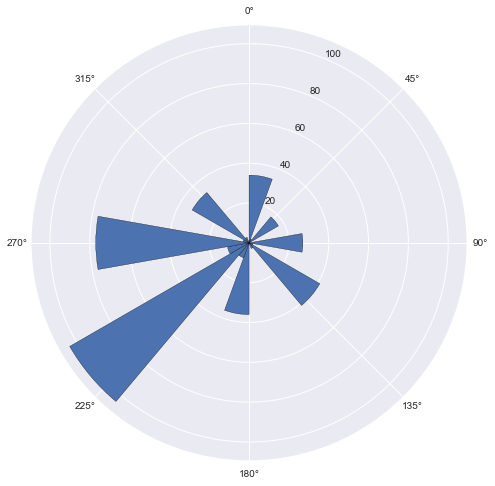

In [33]:
#Windrose
#https://stackoverflow.com/questions/48769599/how-do-i-plot-a-standard-histogram-data-to-a-polar-histogram-using-python-and-py
degrees = df["WindDirectionAtLaunch"]
radians = np.deg2rad(degrees)


bin_size = 20
a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='polar')
ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, edgecolor='k')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.show()

---
## Weather (columns9,10,11,12,13,14)

Now lets look into the weather relationships and trends. The weather at launch favours cloudy and partly cloudy weather, however that is very typical of Galway weather. There are less stormy or rainy entries than expect, but this probably aligns with the busier summer period that Galway station experiences.

In [34]:
df["WeatherAtLaunch"].value_counts()

PART CLOUDY      145
CLOUDY           130
CLEAR SKY         54
CLEAR SKIES       33
OVERCAST          19
RAIN / HAIL       11
SQUALLY            9
MIST               6
FOG                1
OTHER              1
RAIN               1
THUNDER STORM      1
Name: WeatherAtLaunch, dtype: int64

This is very similar to the weather at launch.

In [35]:
df["WeatherAtIncident"].value_counts()

PART CLOUDY      145
CLOUDY           127
CLEAR SKY         54
CLEAR SKIES       32
OVERCAST          18
RAIN / HAIL       11
SQUALLY            9
MIST               6
UNKNOWN            5
FOG                1
OTHER              1
RAIN               1
THUNDER STORM      1
Name: WeatherAtIncident, dtype: int64

In [36]:
df.groupby(['WeatherAtLaunch', 'WeatherAtIncident']).size().reset_index(name='counts')

WeatherAtLaunch WeatherAtIncident  counts
0      CLEAR SKIES       CLEAR SKIES      32
1      CLEAR SKIES           UNKNOWN       1
2        CLEAR SKY         CLEAR SKY      54
3           CLOUDY            CLOUDY     127
4           CLOUDY       PART CLOUDY       1
5           CLOUDY           UNKNOWN       2
6              FOG               FOG       1
7             MIST              MIST       6
8            OTHER             OTHER       1
9         OVERCAST          OVERCAST      18
10        OVERCAST           UNKNOWN       1
11     PART CLOUDY       PART CLOUDY     144
12     PART CLOUDY           UNKNOWN       1
13            RAIN              RAIN       1
14     RAIN / HAIL       RAIN / HAIL      11
15         SQUALLY           SQUALLY       9
16   THUNDER STORM     THUNDER STORM       1

As the inshore lifeboat only operates within the bay the "atIncident" columns may be superfluous. 

Generally good visibility

In [37]:
df["VisibilityAtLaunch"].value_counts()

GOOD         292
FAIR          67
POOR          35
EXCELLENT     17
Name: VisibilityAtLaunch, dtype: int64

In [38]:
df["VisibilityAtIncident"].value_counts()

GOOD         290
FAIR          64
POOR          35
EXCELLENT     17
UNKNOWN        5
Name: VisibilityAtIncident, dtype: int64

In [39]:
df.groupby(['VisibilityAtLaunch', 'VisibilityAtIncident']).size().reset_index(name='counts')

VisibilityAtLaunch VisibilityAtIncident  counts
0          EXCELLENT            EXCELLENT      17
1               FAIR                 FAIR      64
2               FAIR                 GOOD       1
3               FAIR              UNKNOWN       2
4               GOOD                 GOOD     289
5               GOOD              UNKNOWN       3
6               POOR                 POOR      35

Again these values are almost much identical

Trends towards calm weather and counts decrease as conditions intensify

In [40]:
df["SeaConditionsAtLaunch"].value_counts()

CALM          137
SMOOTH         90
SLIGHT         86
CHOPPY         46
ROUGH          26
MOD/CHOP       24
VERY ROUGH      1
GLASS CALM      1
Name: SeaConditionsAtLaunch, dtype: int64

In [41]:
df["SeaConditionsAtIncident"].value_counts()

CALM          134
SMOOTH         88
SLIGHT         86
CHOPPY         46
ROUGH          26
MOD/CHOP       24
VERY ROUGH      1
GLASS CALM      1
Name: SeaConditionsAtIncident, dtype: int64

In [42]:
df.groupby(['SeaConditionsAtLaunch', 'SeaConditionsAtIncident']).size().reset_index(name='counts')

SeaConditionsAtLaunch SeaConditionsAtIncident  counts
0                  CALM                    CALM     134
1                CHOPPY                  CHOPPY      46
2            GLASS CALM              GLASS CALM       1
3              MOD/CHOP                MOD/CHOP      24
4                 ROUGH                   ROUGH      26
5                SLIGHT                  SLIGHT      86
6                SMOOTH                  SMOOTH      88
7            VERY ROUGH              VERY ROUGH       1

The values are identical

Decsision to remove the "atIncident" columns as there is no real differnce between their coressonding values.

##### Weather at Launch

<AxesSubplot:>

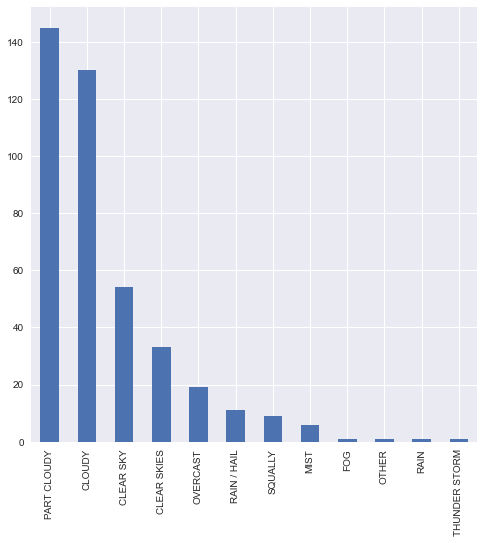

In [43]:
df["WeatherAtLaunch"].value_counts().plot(kind = 'bar')

##### Visibility At Launch

<AxesSubplot:>

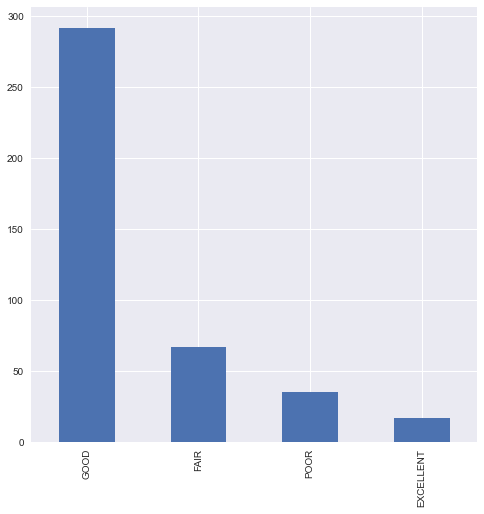

In [44]:
df["VisibilityAtLaunch"].value_counts().plot(kind = 'bar')

#### Sea Conditions At Launch

<AxesSubplot:>

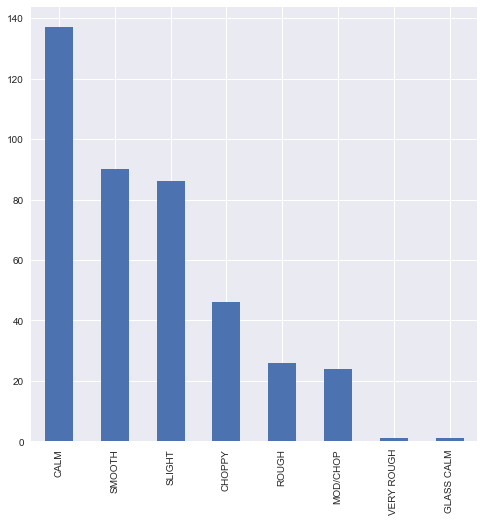

In [45]:
df["SeaConditionsAtLaunch"].value_counts().plot(kind = 'bar')

#### Sea Conditions Stacked on Wind Direction

We can see calmer sea with Northerly winds and higher percentage of rougher sea with westerly and south westerlies.

<AxesSubplot:xlabel='WindDirectionAtLaunch', ylabel='Count'>

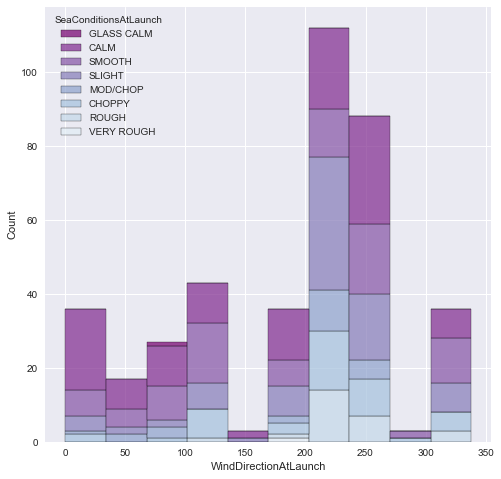

In [46]:
hue_order = ['GLASS CALM', 'CALM', 'SMOOTH','SLIGHT', 'MOD/CHOP', 'CHOPPY','ROUGH', 'VERY ROUGH']
sns.histplot( x="WindDirectionAtLaunch", hue="SeaConditionsAtLaunch", 
             data = df, palette="BuPu_r", hue_order = hue_order, multiple = "stack")


Lets have a look numerically at weather and Sea conditions.

In [47]:
df.groupby(['WeatherAtLaunch', 'SeaConditionsAtLaunch']).size().reset_index(name='counts')

WeatherAtLaunch SeaConditionsAtLaunch  counts
0      CLEAR SKIES                  CALM      23
1      CLEAR SKIES                SLIGHT       5
2      CLEAR SKIES                SMOOTH       5
3        CLEAR SKY                  CALM      41
4        CLEAR SKY                CHOPPY       3
5        CLEAR SKY            GLASS CALM       1
6        CLEAR SKY                SLIGHT       2
7        CLEAR SKY                SMOOTH       7
8           CLOUDY                  CALM      27
9           CLOUDY                CHOPPY      20
10          CLOUDY              MOD/CHOP       9
11          CLOUDY                 ROUGH      16
12          CLOUDY                SLIGHT      36
13          CLOUDY                SMOOTH      22
14             FOG                  CALM       1
15            MIST                  CALM       1
16            MIST              MOD/CHOP       1
17            MIST                SLIGHT       4
18           OTHER                 ROUGH       1
19        OVERCAST                  CALM       3
20        OVERCAST                CHOPPY       2
21        OVERCAST                 ROUGH       1
22        OVERCAST                SLIGHT       3
23        OVERCAST                SMOOTH      10
24     PART CLOUDY                  CALM      41
25     PART CLOUDY                CHOPPY      19
26     PART CLOUDY              MOD/CHOP       3
27     PART CLOUDY                 ROUGH       6
28     PART CLOUDY                SLIGHT      33
29     PART CLOUDY                SMOOTH      43
30            RAIN                 ROUGH       1
31     RAIN / HAIL              MOD/CHOP       6
32     RAIN / HAIL                SLIGHT       2
33     RAIN / HAIL                SMOOTH       3
34         SQUALLY                CHOPPY       2
35         SQUALLY              MOD/CHOP       4
36         SQUALLY                 ROUGH       1
37         SQUALLY                SLIGHT       1
38         SQUALLY            VERY ROUGH       1
39   THUNDER STORM              MOD/CHOP       1

<AxesSubplot:xlabel='WeatherAtLaunch', ylabel='Count'>

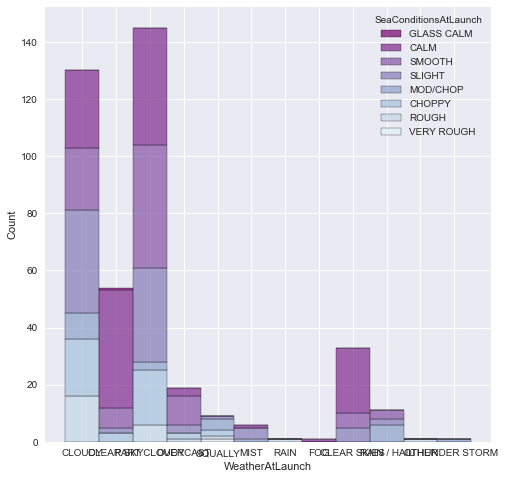

In [48]:
hue_order = ['GLASS CALM', 'CALM', 'SMOOTH','SLIGHT', 'MOD/CHOP', 'CHOPPY','ROUGH', 'VERY ROUGH']
sns.histplot( x="WeatherAtLaunch", hue="SeaConditionsAtLaunch", 
             data = df, palette="BuPu_r", hue_order = hue_order, multiple = "stack")


---
## Coordinates (columns15,16)

Now lets have a look and the "X" and "Y" columns that represent longtitude and latitude coordinates.

In [49]:
df[['X','Y']].describe()

X           Y
count  406.000000  406.000000
mean    -9.073099   53.245047
std      0.088237    0.031696
min     -9.783900   53.124400
25%     -9.089723   53.241700
50%     -9.050000   53.254495
75%     -9.025100   53.266150
max     -8.936870   53.291700

Plotting them as a standard scatter you cannot discern much, to the casual observer this will not show anything. If howver you are familiar with Galway Bay you can discern the general shape and the cluster in the top right, which will likely be the docks and river.

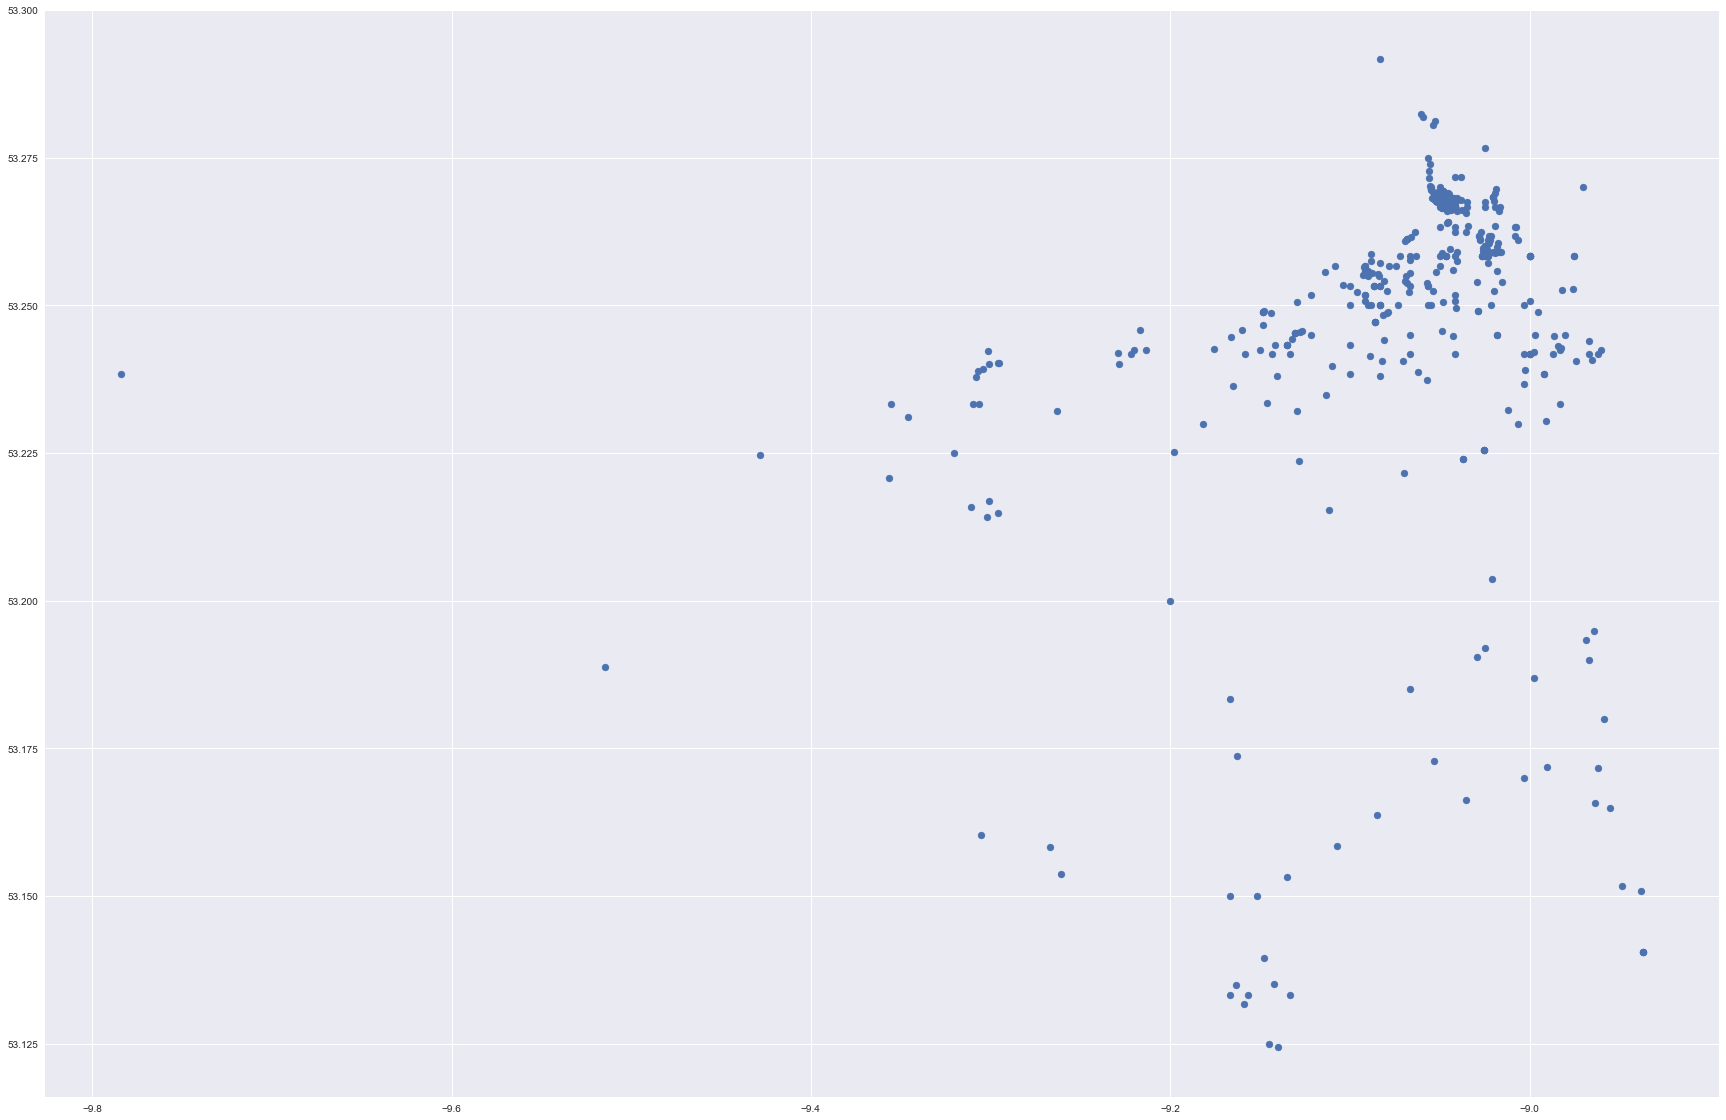

In [50]:
plt.figure(figsize=(30,20))
x = df["X"]
y = df["Y"]
plt.scatter(x,y)

Not very useful without map, using plotly.express we can get a much clearer picture of the distribution.

In [51]:
import plotly.express as px

px.set_mapbox_access_token(open("./mapbox/mapbox_token").read())
fig = px.scatter_mapbox(df, lat="Y", lon="X", size_max=15, zoom=10)
fig.show()

An image of the above plot has been included as the interactive map plot is not rendering on Github.

![image](./images/bayreal.png)

This may be very hard to replicate without using more advanced Machine Learning libraries like K-Means with clustering capabilities. 

---
# Reconstructing the dataframe

#### We can now go through step by step the generation of a new dataset

### Column 1 Station

Create the data frame

In [52]:
#create the data frame
dfc = pd.DataFrame()

We can set all values of "LifeboatStationNameProper" to the new dataframe

In [53]:
#Assign all of df to dfc for column
dfc['LifeboatStationNameProper'] = df['LifeboatStationNameProper']

In [54]:
dfc

LifeboatStationNameProper
367                       GALWAY
368                       GALWAY
369                       GALWAY
486                       GALWAY
656                       GALWAY
...                          ...
111198                    GALWAY
111207                    GALWAY
111209                    GALWAY
112149                    GALWAY
112151                    GALWAY

[411 rows x 1 columns]

To reset the index

In [55]:
dfc = dfc.reset_index(drop=True)
dfc

LifeboatStationNameProper
0                      GALWAY
1                      GALWAY
2                      GALWAY
3                      GALWAY
4                      GALWAY
..                        ...
406                    GALWAY
407                    GALWAY
408                    GALWAY
409                    GALWAY
410                    GALWAY

[411 rows x 1 columns]

---
### Column 2 Year of Call

For the year of call we can find the probability of each years occurance and generate a random new variable with set probabilites per year.

In [56]:
df["YearOfCall"].value_counts()

2019    66
2016    48
2020    34
2014    33
2013    31
2011    28
2008    27
2017    26
2009    26
2012    25
2010    24
2015    23
2018    20
Name: YearOfCall, dtype: int64

In [57]:
#divide each year value by total
ys=(27,26,24,28,25,31,33,23,48,26,20,66,34)
y = [y/411 for y in ys]

y

[0.06569343065693431,
 0.06326034063260341,
 0.058394160583941604,
 0.0681265206812652,
 0.06082725060827251,
 0.07542579075425791,
 0.08029197080291971,
 0.05596107055961071,
 0.11678832116788321,
 0.06326034063260341,
 0.04866180048661801,
 0.16058394160583941,
 0.0827250608272506]

Insert the probabilites into the random.choice generator used for discrete data distribution set to a temporary array.

In [58]:
dfy = pd.DataFrame()
year = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
dfy['year'] = np.random.choice(year, 411, p=[0.06569343065693431,
                                             0.06326034063260341,
                                             0.058394160583941604,
                                             0.0681265206812652,
                                             0.06082725060827251,
                                             0.07542579075425791,
                                             0.08029197080291971,
                                             0.05596107055961071,
                                             0.11678832116788321,
                                             0.06326034063260341,
                                             0.04866180048661801,
                                             0.16058394160583941,
                                             0.0827250608272506])

In [59]:
dfy

year
0    2015
1    2019
2    2013
3    2014
4    2019
..    ...
406  2019
407  2014
408  2015
409  2020
410  2015

[411 rows x 1 columns]

Copy the values into our dataframe.

In [60]:
dfc['YearOfCall'] = dfy['year']
dfc

LifeboatStationNameProper YearOfCall
0                      GALWAY       2015
1                      GALWAY       2019
2                      GALWAY       2013
3                      GALWAY       2014
4                      GALWAY       2019
..                        ...        ...
406                    GALWAY       2019
407                    GALWAY       2014
408                    GALWAY       2015
409                    GALWAY       2020
410                    GALWAY       2015

[411 rows x 2 columns]

---
### Column 3 Launch Time

We can perform the same process for Launch time.

In [61]:
ltime['LaunchTime'].groupby(ltime.LaunchTime.dt.to_period("H")).agg('count')

LaunchTime
2022-01-03 00:00     4
2022-01-03 01:00     5
2022-01-03 02:00    12
2022-01-03 03:00     6
2022-01-03 04:00     9
2022-01-03 05:00     7
2022-01-03 06:00     3
2022-01-03 07:00     4
2022-01-03 08:00     9
2022-01-03 09:00    12
2022-01-03 10:00     9
2022-01-03 11:00    17
2022-01-03 12:00    24
2022-01-03 13:00    25
2022-01-03 14:00    26
2022-01-03 15:00    31
2022-01-03 16:00    45
2022-01-03 17:00    24
2022-01-03 18:00    37
2022-01-03 19:00    24
2022-01-03 20:00    31
2022-01-03 21:00    17
2022-01-03 22:00     9
2022-01-03 23:00    21
Freq: H, Name: LaunchTime, dtype: int64

Calculate the probabilites

In [62]:
hours = (4,5,12,6,9,7,3,4,9,12,9,17,24,25,26,31,45,24,37,24,31,17,9,21)
p = [hour/411 for hour in hours]

p

[0.009732360097323601,
 0.012165450121654502,
 0.029197080291970802,
 0.014598540145985401,
 0.021897810218978103,
 0.0170316301703163,
 0.0072992700729927005,
 0.009732360097323601,
 0.021897810218978103,
 0.029197080291970802,
 0.021897810218978103,
 0.0413625304136253,
 0.058394160583941604,
 0.06082725060827251,
 0.06326034063260341,
 0.07542579075425791,
 0.10948905109489052,
 0.058394160583941604,
 0.09002433090024331,
 0.058394160583941604,
 0.07542579075425791,
 0.0413625304136253,
 0.021897810218978103,
 0.051094890510948905]

Insert the probabilites into the random.choice generator used for discrete data distribution set to a temporary array to create the hour, then we can create a random integer between one and 60 for the minute and convert all to seconds.

In [63]:
t = []
for i in range (411):
    h = np.random.choice(np.arange(0, 24), p=[0.009732360097323601,
                                             0.012165450121654502,
                                             0.029197080291970802,
                                             0.014598540145985401,
                                             0.021897810218978103,
                                             0.0170316301703163,
                                             0.0072992700729927005,
                                             0.009732360097323601,
                                             0.021897810218978103,
                                             0.029197080291970802,
                                             0.021897810218978103,
                                             0.0413625304136253,
                                             0.058394160583941604,
                                             0.06082725060827251,
                                             0.06326034063260341,
                                             0.07542579075425791,
                                             0.10948905109489052,
                                             0.058394160583941604,
                                             0.09002433090024331,
                                             0.058394160583941604,
                                             0.07542579075425791,
                                             0.0413625304136253,
                                             0.021897810218978103,
                                             0.051094890510948905])
    #random generate the minutes
    s = random.randint(0,60)
    #make decimal
    s = s/60
    #create the time in seconds 
    time = (s+h)*3600
    t.append(int(time))
    
dft = pd.DataFrame()
dft['time'] = t
dft

time
0    31800
1    41460
2    48900
3    83400
4    68580
..     ...
406  69600
407  55560
408  73740
409  55620
410  58379

[411 rows x 1 columns]

Now that we have a randomly created time points that fi the trend group by hour. And convert it to datetime format

In [64]:
#convert to datetime
dft['time'] = dft['time'].astype('float64') 
dft['time'] = pd.to_datetime(dft["time"], unit='s')

In [65]:
#display time only
dft['time'] = pd.to_datetime(dft['time']).dt.time
dft

time
0    08:50:00
1    11:31:00
2    13:35:00
3    23:10:00
4    19:03:00
..        ...
406  19:20:00
407  15:26:00
408  20:29:00
409  15:27:00
410  16:12:59

[411 rows x 1 columns]

Append to dataframe.

In [66]:
dfc['LaunchTime'] = dft['time']

In [67]:
dfc

LifeboatStationNameProper YearOfCall LaunchTime
0                      GALWAY       2015   08:50:00
1                      GALWAY       2019   11:31:00
2                      GALWAY       2013   13:35:00
3                      GALWAY       2014   23:10:00
4                      GALWAY       2019   19:03:00
..                        ...        ...        ...
406                    GALWAY       2019   19:20:00
407                    GALWAY       2014   15:26:00
408                    GALWAY       2015   20:29:00
409                    GALWAY       2020   15:27:00
410                    GALWAY       2015   16:12:59

[411 rows x 3 columns]

---
### Column 4 Date of Launch

We already have the year of launch generated, so we can use this value and the month trned found earlier to generate the date of launch.

In [68]:
#temp df
dfy = pd.DataFrame()

#Assign year
dfy['year'] = dfc['YearOfCall']

In [69]:
dfy

year
0    2015
1    2019
2    2013
3    2014
4    2019
..    ...
406  2019
407  2014
408  2015
409  2020
410  2015

[411 rows x 1 columns]

Next we can generate a month based on trends and assing it to the row.

In [70]:
#Months based on counts
months = (28,23,33,32,39,57,48,47,35,31,18,20)
#probabilities
p = [month/411 for month in months]

p

[0.0681265206812652,
 0.05596107055961071,
 0.08029197080291971,
 0.07785888077858881,
 0.0948905109489051,
 0.1386861313868613,
 0.11678832116788321,
 0.11435523114355231,
 0.0851581508515815,
 0.07542579075425791,
 0.043795620437956206,
 0.04866180048661801]

Generate the month with random.choice

In [71]:
rng = np.random.default_rng()
#Create an array of colours
month = [1,2,3,4,5,6,7,8,9,10,11,12]
#Alter the probabilites of the colours appearing
months = rng.choice(month,411, p= [0.0681265206812652,
                                     0.05596107055961071,
                                     0.08029197080291971,
                                     0.07785888077858881,
                                     0.0948905109489051,
                                     0.1386861313868613,
                                     0.11678832116788321,
                                     0.11435523114355231,
                                     0.0851581508515815,
                                     0.07542579075425791,
                                     0.043795620437956206,
                                     0.04866180048661801])

# dfb = pd.DataFrame()
dfy['month'] = months
dfy

year  month
0    2015      3
1    2019      6
2    2013      4
3    2014      5
4    2019      2
..    ...    ...
406  2019      3
407  2014     11
408  2015      9
409  2020      3
410  2015      6

[411 rows x 2 columns]

We didn't investigate trends within the month so this will be generated with a random integer per month.

In [72]:
def days(dfy):
    if dfy['month']== 1:
        d = random.randint(1,31)
        return d
    if dfy['month']== 2:
        d = random.randint(1,28)
        return d
    if dfy['month']== 3:
        d = random.randint(1,31)
        return d
    if dfy['month']== 4:
        d = random.randint(1,30)
        return d
    if dfy['month']== 5:
        d = random.randint(1,31)
        return d
    if dfy['month']== 6:
        d = random.randint(1,30)
        return d
    if dfy['month']== 7:
        d = random.randint(1,31)
        return d
    if dfy['month']== 8:
        d = random.randint(1,31)
        return d
    if dfy['month']== 9:
        d = random.randint(1,30)
        return d
    if dfy['month']== 10:
        d = random.randint(1,31)
        return d
    if dfy['month']== 11:
        d = random.randint(1,30)
        return d
    if dfy['month']== 12:
        d = random.randint(1,31)
        return d


In [73]:
days = dfy.apply (lambda row: days(row), axis=1)
dfy['day'] = days

So now theres a randomly generated date, that just need to be put together.

In [74]:
dfy

year  month  day
0    2015      3   15
1    2019      6   13
2    2013      4   12
3    2014      5   15
4    2019      2   13
..    ...    ...  ...
406  2019      3   30
407  2014     11   28
408  2015      9   19
409  2020      3   25
410  2015      6    4

[411 rows x 3 columns]

In [75]:
dfy.dtypes

year     object
month     int32
day       int64
dtype: object

Need to convert all to int

In [76]:
dfy["year"] = dfy["year"].astype(int)
dfy["month"] = dfy["month"].astype(int)
dfy["day"] = dfy["day"].astype(int)

Concatentate to datetime

In [77]:
#Force through and ignore errors
date = pd.to_datetime(dfy,errors='coerce')

Now we have some dates.

In [78]:
date

0     2015-03-15
1     2019-06-13
2     2013-04-12
3     2014-05-15
4     2019-02-13
         ...    
406   2019-03-30
407   2014-11-28
408   2015-09-19
409   2020-03-25
410   2015-06-04
Length: 411, dtype: datetime64[ns]

Add to the dataframe

In [79]:
dfc['DateOfLaunch'] = date
dfc

LifeboatStationNameProper YearOfCall LaunchTime DateOfLaunch
0                      GALWAY       2015   08:50:00   2015-03-15
1                      GALWAY       2019   11:31:00   2019-06-13
2                      GALWAY       2013   13:35:00   2013-04-12
3                      GALWAY       2014   23:10:00   2014-05-15
4                      GALWAY       2019   19:03:00   2019-02-13
..                        ...        ...        ...          ...
406                    GALWAY       2019   19:20:00   2019-03-30
407                    GALWAY       2014   15:26:00   2014-11-28
408                    GALWAY       2015   20:29:00   2015-09-19
409                    GALWAY       2020   15:27:00   2020-03-25
410                    GALWAY       2015   16:12:59   2015-06-04

[411 rows x 4 columns]

---
### Columns 5,6,7 Lifeboats

Next we can generate the lifeboat columns. First with a temp df.

In [80]:
dfl = pd.DataFrame()

And assign the dates to reference when the lifeboats were in service.

In [81]:
dfl["date"] = dfc['DateOfLaunch']
dfl

date
0   2015-03-15
1   2019-06-13
2   2013-04-12
3   2014-05-15
4   2019-02-13
..         ...
406 2019-03-30
407 2014-11-28
408 2015-09-19
409 2020-03-25
410 2015-06-04

[411 rows x 1 columns]

Using the bounds of when each boat was in service we can accurately replicate the real life data.

In [82]:
def boat(dfl):
    d1 = datetime.datetime(2010, 6, 30)
    d2 = datetime.datetime(2011, 8, 31)
    d3 = datetime.datetime(2020, 1, 31)
    d4 = datetime.datetime(2020, 11, 30)       
    
    
    if dfl['date'] <= d1:
        return 'B-738'
    if dfl['date'] <= d2:
        return 'B-757'
    if dfl['date'] <= d3:
        return 'B-853'
    if dfl['date'] <= d4:
        return 'B-810'
    if dfl['date'] > d4:
        return 'B-853'


Process the above function and add to temp df.

In [83]:
boat = dfl.apply (lambda row: boat(row), axis=1)
dfl['LifeboatNumber'] = boat
dfl

date LifeboatNumber
0   2015-03-15          B-853
1   2019-06-13          B-853
2   2013-04-12          B-853
3   2014-05-15          B-853
4   2019-02-13          B-853
..         ...            ...
406 2019-03-30          B-853
407 2014-11-28          B-853
408 2015-09-19          B-853
409 2020-03-25          B-810
410 2015-06-04          B-853

[411 rows x 2 columns]

Add to the main dataframe.

In [84]:
dfc['LifeboatNumber'] = dfl['LifeboatNumber']
dfc

LifeboatStationNameProper YearOfCall LaunchTime DateOfLaunch  \
0                      GALWAY       2015   08:50:00   2015-03-15   
1                      GALWAY       2019   11:31:00   2019-06-13   
2                      GALWAY       2013   13:35:00   2013-04-12   
3                      GALWAY       2014   23:10:00   2014-05-15   
4                      GALWAY       2019   19:03:00   2019-02-13   
..                        ...        ...        ...          ...   
406                    GALWAY       2019   19:20:00   2019-03-30   
407                    GALWAY       2014   15:26:00   2014-11-28   
408                    GALWAY       2015   20:29:00   2015-09-19   
409                    GALWAY       2020   15:27:00   2020-03-25   
410                    GALWAY       2015   16:12:59   2015-06-04   

    LifeboatNumber  
0            B-853  
1            B-853  
2            B-853  
3            B-853  
4            B-853  
..             ...  
406          B-853  
407          B-853  
408          B-853  
409          B-810  
410          B-853  

[411 rows x 5 columns]

---

Now to assign the Lifeboat Number to the correct Lifeboat Class and add values to the dataframe.

In [85]:
def boatClass(dfc): 
    
    
    if dfc['LifeboatNumber'] == 'B-738':
        return 'ATLANTIC 75'
    if dfc['LifeboatNumber'] == 'B-757':
        return 'ATLANTIC 75'
    if dfc['LifeboatNumber'] == 'B-853':
        return 'ATLANTIC 85'
    if dfc['LifeboatNumber'] == 'B-810':
        return 'ATLANTIC 85'

In [86]:
boatClass = dfc.apply (lambda row: boatClass(row), axis=1)
dfc['LifeboatClass'] = boatClass
dfc

LifeboatStationNameProper YearOfCall LaunchTime DateOfLaunch  \
0                      GALWAY       2015   08:50:00   2015-03-15   
1                      GALWAY       2019   11:31:00   2019-06-13   
2                      GALWAY       2013   13:35:00   2013-04-12   
3                      GALWAY       2014   23:10:00   2014-05-15   
4                      GALWAY       2019   19:03:00   2019-02-13   
..                        ...        ...        ...          ...   
406                    GALWAY       2019   19:20:00   2019-03-30   
407                    GALWAY       2014   15:26:00   2014-11-28   
408                    GALWAY       2015   20:29:00   2015-09-19   
409                    GALWAY       2020   15:27:00   2020-03-25   
410                    GALWAY       2015   16:12:59   2015-06-04   

    LifeboatNumber LifeboatClass  
0            B-853   ATLANTIC 85  
1            B-853   ATLANTIC 85  
2            B-853   ATLANTIC 85  
3            B-853   ATLANTIC 85  
4            B-853   ATLANTIC 85  
..             ...           ...  
406          B-853   ATLANTIC 85  
407          B-853   ATLANTIC 85  
408          B-853   ATLANTIC 85  
409          B-810   ATLANTIC 85  
410          B-853   ATLANTIC 85  

[411 rows x 6 columns]

---

All the Galway boats were Inshore LifeBoats so all should equal "ILB"

In [87]:
#Assign ILB to all rows
dfc['RoSType'] = 'ILB'
dfc

LifeboatStationNameProper YearOfCall LaunchTime DateOfLaunch  \
0                      GALWAY       2015   08:50:00   2015-03-15   
1                      GALWAY       2019   11:31:00   2019-06-13   
2                      GALWAY       2013   13:35:00   2013-04-12   
3                      GALWAY       2014   23:10:00   2014-05-15   
4                      GALWAY       2019   19:03:00   2019-02-13   
..                        ...        ...        ...          ...   
406                    GALWAY       2019   19:20:00   2019-03-30   
407                    GALWAY       2014   15:26:00   2014-11-28   
408                    GALWAY       2015   20:29:00   2015-09-19   
409                    GALWAY       2020   15:27:00   2020-03-25   
410                    GALWAY       2015   16:12:59   2015-06-04   

    LifeboatNumber LifeboatClass RoSType  
0            B-853   ATLANTIC 85     ILB  
1            B-853   ATLANTIC 85     ILB  
2            B-853   ATLANTIC 85     ILB  
3            B-853   ATLANTIC 85     ILB  
4            B-853   ATLANTIC 85     ILB  
..             ...           ...     ...  
406          B-853   ATLANTIC 85     ILB  
407          B-853   ATLANTIC 85     ILB  
408          B-853   ATLANTIC 85     ILB  
409          B-810   ATLANTIC 85     ILB  
410          B-853   ATLANTIC 85     ILB  

[411 rows x 7 columns]

---
### Columns 8,9 Wind

I decided to create a win Bearing column as well as a Direction for easier reading.

In [88]:
df["WindDirectionAtLaunch"].value_counts()

225.0    104
270.0     77
135.0     41
180.0     36
0.0       34
315.0     33
90.0      27
45.0      17
248.0     11
203.0      8
293.0      3
158.0      3
338.0      3
113.0      2
23.0       2
Name: WindDirectionAtLaunch, dtype: int64

Generate the probabilities of bearings.

In [89]:
bearings = (35,2,17,0,28,2,42,3,38,8,107,11,78,3,34,3)
p = [bearing/411 for bearing in bearings]

p

[0.0851581508515815,
 0.004866180048661801,
 0.0413625304136253,
 0.0,
 0.0681265206812652,
 0.004866180048661801,
 0.10218978102189781,
 0.0072992700729927005,
 0.09245742092457421,
 0.019464720194647202,
 0.26034063260340634,
 0.0267639902676399,
 0.1897810218978102,
 0.0072992700729927005,
 0.0827250608272506,
 0.0072992700729927005]

Use random.choice for creation of Bearing.

In [90]:
#Create an array of colours
bearing = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE","SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"]
#Alter the probabilites of the colours appearing
bearings = rng.choice(bearing,411, p= [0.0851581508515815,
                                     0.004866180048661801,
                                     0.0413625304136253,
                                     0.0,
                                     0.0681265206812652,
                                     0.004866180048661801,
                                     0.10218978102189781,
                                     0.0072992700729927005,
                                     0.09245742092457421,
                                     0.019464720194647202,
                                     0.26034063260340634,
                                     0.0267639902676399,
                                     0.1897810218978102,
                                     0.0072992700729927005,
                                     0.0827250608272506,
                                     0.0072992700729927005])

dfb = pd.DataFrame()
dfb['bearing'] = bearings
dfb

bearing
0         W
1        SE
2        SW
3         E
4         S
..      ...
406       W
407       W
408      SW
409       S
410       W

[411 rows x 1 columns]

And append to df

In [91]:
dfc["WindBearingAtLaunch"] = dfb['bearing']
dfc

LifeboatStationNameProper YearOfCall LaunchTime DateOfLaunch  \
0                      GALWAY       2015   08:50:00   2015-03-15   
1                      GALWAY       2019   11:31:00   2019-06-13   
2                      GALWAY       2013   13:35:00   2013-04-12   
3                      GALWAY       2014   23:10:00   2014-05-15   
4                      GALWAY       2019   19:03:00   2019-02-13   
..                        ...        ...        ...          ...   
406                    GALWAY       2019   19:20:00   2019-03-30   
407                    GALWAY       2014   15:26:00   2014-11-28   
408                    GALWAY       2015   20:29:00   2015-09-19   
409                    GALWAY       2020   15:27:00   2020-03-25   
410                    GALWAY       2015   16:12:59   2015-06-04   

    LifeboatNumber LifeboatClass RoSType WindBearingAtLaunch  
0            B-853   ATLANTIC 85     ILB                   W  
1            B-853   ATLANTIC 85     ILB                  SE  
2            B-853   ATLANTIC 85     ILB                  SW  
3            B-853   ATLANTIC 85     ILB                   E  
4            B-853   ATLANTIC 85     ILB                   S  
..             ...           ...     ...                 ...  
406          B-853   ATLANTIC 85     ILB                   W  
407          B-853   ATLANTIC 85     ILB                   W  
408          B-853   ATLANTIC 85     ILB                  SW  
409          B-810   ATLANTIC 85     ILB                   S  
410          B-853   ATLANTIC 85     ILB                   W  

[411 rows x 8 columns]

Now for the Wind Direction there is a direct transfer of bearing to direction.

In [92]:
def bearings(dfc):
    if dfc['WindBearingAtLaunch']== 'N':
        return 0
    if dfc['WindBearingAtLaunch']== 'NNE':
        return 23
    if dfc['WindBearingAtLaunch']== 'NE':
        return 45
    if dfc['WindBearingAtLaunch']== 'ENE':
        return 68
    if dfc['WindBearingAtLaunch']== 'E':
        return 90
    if dfc['WindBearingAtLaunch']== 'ESE':
        return 113
    if dfc['WindBearingAtLaunch']== 'SE':
        return 135
    if dfc['WindBearingAtLaunch']== 'SSE':
        return 158
    if dfc['WindBearingAtLaunch']== 'S':
        return 180
    if dfc['WindBearingAtLaunch']== 'SSW':
        return 203
    if dfc['WindBearingAtLaunch']== 'SW':
        return 225
    if dfc['WindBearingAtLaunch']== 'WSW':
        return 248
    if dfc['WindBearingAtLaunch']== 'W':
        return 270
    if dfc['WindBearingAtLaunch']== 'WNW':
        return 293
    if dfc['WindBearingAtLaunch']== 'NW':
        return 315
    if dfc['WindBearingAtLaunch']== 'NNW':
        return 338


Perform the iteration and append to dataframe.

In [93]:
direction = dfc.apply (lambda row: bearings(row), axis=1)
dfc['WindDirectionAtLaunch'] = direction

In [94]:
dfc

LifeboatStationNameProper YearOfCall LaunchTime DateOfLaunch  \
0                      GALWAY       2015   08:50:00   2015-03-15   
1                      GALWAY       2019   11:31:00   2019-06-13   
2                      GALWAY       2013   13:35:00   2013-04-12   
3                      GALWAY       2014   23:10:00   2014-05-15   
4                      GALWAY       2019   19:03:00   2019-02-13   
..                        ...        ...        ...          ...   
406                    GALWAY       2019   19:20:00   2019-03-30   
407                    GALWAY       2014   15:26:00   2014-11-28   
408                    GALWAY       2015   20:29:00   2015-09-19   
409                    GALWAY       2020   15:27:00   2020-03-25   
410                    GALWAY       2015   16:12:59   2015-06-04   

    LifeboatNumber LifeboatClass RoSType WindBearingAtLaunch  \
0            B-853   ATLANTIC 85     ILB                   W   
1            B-853   ATLANTIC 85     ILB                  SE   
2            B-853   ATLANTIC 85     ILB                  SW   
3            B-853   ATLANTIC 85     ILB                   E   
4            B-853   ATLANTIC 85     ILB                   S   
..             ...           ...     ...                 ...   
406          B-853   ATLANTIC 85     ILB                   W   
407          B-853   ATLANTIC 85     ILB                   W   
408          B-853   ATLANTIC 85     ILB                  SW   
409          B-810   ATLANTIC 85     ILB                   S   
410          B-853   ATLANTIC 85     ILB                   W   

     WindDirectionAtLaunch  
0                      270  
1                      135  
2                      225  
3                       90  
4                      180  
..                     ...  
406                    270  
407                    270  
408                    225  
409                    180  
410                    270  

[411 rows x 9 columns]

In [95]:
dfc.dtypes

LifeboatStationNameProper            object
YearOfCall                           object
LaunchTime                           object
DateOfLaunch                 datetime64[ns]
LifeboatNumber                       object
LifeboatClass                        object
RoSType                              object
WindBearingAtLaunch                  object
WindDirectionAtLaunch                 int64
dtype: object

Just to check we can create another Windrose of the random data, and they seem sot correspond.

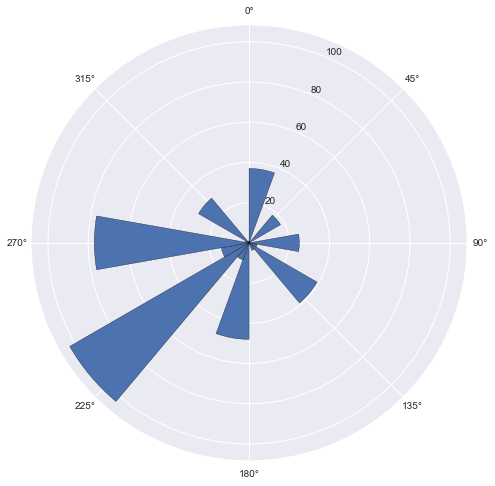

In [96]:
degrees = dfc["WindDirectionAtLaunch"]
radians = np.deg2rad(degrees)


bin_size = 20
a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='polar')
ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, edgecolor='k')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.show()

---
### Column 10 

Now on to the weather, we will generate the Weather based of of the wind direction, although not entirely accurate predictor it will correspond with the real life data and produce an accurate representation.

In [97]:
df.groupby(['WindDirectionAtLaunch', 'WeatherAtLaunch']).size().reset_index(name='counts')

WindDirectionAtLaunch WeatherAtLaunch  counts
0                     0.0     CLEAR SKIES       3
1                     0.0       CLEAR SKY       8
2                     0.0          CLOUDY       6
3                     0.0             FOG       1
4                     0.0        OVERCAST       1
..                    ...             ...     ...
62                  315.0           OTHER       1
63                  315.0        OVERCAST       2
64                  315.0     PART CLOUDY      13
65                  338.0          CLOUDY       2
66                  338.0     PART CLOUDY       1

[67 rows x 3 columns]

Based of the count randomchoice is used to sway the proabilities based on wind direction, with each weather type having at least a small probability as weather is unpredictable. 

In [98]:
def weather(dfc):
    conditions = ['CLEAR SKY','PART CLOUDY','CLOUDY','OVERCAST','RAIN / HAIL','SQUALLY','MIST','FOG','STORM']
    
    if dfc['WindBearingAtLaunch']== 'N':
        weather = rng.choice(conditions,1, p= [0.32,0.33,0.17,0.05,0.05,0.01,0.01,0.01,0.05])
        return weather
    if dfc['WindBearingAtLaunch']== 'NNE':
        weather = rng.choice(conditions,1, p= [0.465,0.465,0.01,0.01,0.01,0.01,0.01,0.01,0.01])
        return weather
    if dfc['WindBearingAtLaunch']== 'NE':
        weather = rng.choice(conditions,1, p= [0.22,0.28,0.4,0.05,0.01,0.01,0.01,0.01,0.01])
        return weather
    if dfc['WindBearingAtLaunch']== 'ENE':
        weather = rng.choice(conditions,1, p= [0.22,0.28,0.4,0.05,0.01,0.01,0.01,0.01,0.01])
        return weather
    if dfc['WindBearingAtLaunch']== 'E':
        weather = rng.choice(conditions,1, p= [0.34,0.17,0.34,0.01,0.1,0.01,0.01,0.01,0.01])
        return weather
    if dfc['WindBearingAtLaunch']== 'ESE':
        weather = rng.choice(conditions,1, p= [0.465,0.465,0.01,0.01,0.01,0.01,0.01,0.01,0.01])
        return weather
    if dfc['WindBearingAtLaunch']== 'SE':
        weather = rng.choice(conditions,1, p= [0.11,0.38,0.37,0.09,0.01,0.01,0.01,0.01,0.01])
        return weather
    if dfc['WindBearingAtLaunch']== 'SSE':
        weather = rng.choice(conditions,1,p= [0.11,0.38,0.37,0.09,0.01,0.01,0.01,0.01,0.01])
        return weather
    if dfc['WindBearingAtLaunch']== 'S':
        weather = rng.choice(conditions,1, p= [0.23,0.23,0.36,0.07,0.05,0.02,0.02,0.01,0.01])
        return weather
    if dfc['WindBearingAtLaunch']== 'SSW':
        weather = rng.choice(conditions,1, p= [0.23,0.23,0.36,0.07,0.05,0.02,0.02,0.01,0.01])
        return weather
    if dfc['WindBearingAtLaunch']== 'SW':
        weather = rng.choice(conditions,1,p= [0.14,0.41,0.31,0.01,0.05,0.02,0.04,0.01,0.01])
        return weather
    if dfc['WindBearingAtLaunch']== 'WSW':
        weather = rng.choice(conditions,1, p= [0.02,0.02,0.9,0.01,0.01,0.01,0.01,0.01,0.01])
        return weather
    if dfc['WindBearingAtLaunch']== 'W':
        weather = rng.choice(conditions,1, p= [0.25,0.25,0.26,0.07,0.02,0.07,0.03,0.03,0.02])
        return weather
    if dfc['WindBearingAtLaunch']== 'WNW':
        weather = rng.choice(conditions,1, p= [0.02,0.9,0.02,0.01,0.01,0.01,0.01,0.01,0.01])
        return weather
    if dfc['WindBearingAtLaunch']== 'NW':
        weather = rng.choice(conditions,1, p= [0.15,0.4,0.25,0.11,0.01,0.01,0.01,0.01,0.05])
        return weather
    if dfc['WindBearingAtLaunch']== 'NNW':
        weather = rng.choice(conditions,1, p= [0.04,0.30,0.60,0.01,0.01,0.01,0.01,0.01,0.01])
        return weather

Iterate the function and append the the dataframe.

In [99]:
weathers = dfc.apply (lambda row: weather(row), axis=1)

dfc['WeatherAtLaunch'] = weathers.str[0]

In [100]:
dfc

LifeboatStationNameProper YearOfCall LaunchTime DateOfLaunch  \
0                      GALWAY       2015   08:50:00   2015-03-15   
1                      GALWAY       2019   11:31:00   2019-06-13   
2                      GALWAY       2013   13:35:00   2013-04-12   
3                      GALWAY       2014   23:10:00   2014-05-15   
4                      GALWAY       2019   19:03:00   2019-02-13   
..                        ...        ...        ...          ...   
406                    GALWAY       2019   19:20:00   2019-03-30   
407                    GALWAY       2014   15:26:00   2014-11-28   
408                    GALWAY       2015   20:29:00   2015-09-19   
409                    GALWAY       2020   15:27:00   2020-03-25   
410                    GALWAY       2015   16:12:59   2015-06-04   

    LifeboatNumber LifeboatClass RoSType WindBearingAtLaunch  \
0            B-853   ATLANTIC 85     ILB                   W   
1            B-853   ATLANTIC 85     ILB                  SE   
2            B-853   ATLANTIC 85     ILB                  SW   
3            B-853   ATLANTIC 85     ILB                   E   
4            B-853   ATLANTIC 85     ILB                   S   
..             ...           ...     ...                 ...   
406          B-853   ATLANTIC 85     ILB                   W   
407          B-853   ATLANTIC 85     ILB                   W   
408          B-853   ATLANTIC 85     ILB                  SW   
409          B-810   ATLANTIC 85     ILB                   S   
410          B-853   ATLANTIC 85     ILB                   W   

     WindDirectionAtLaunch WeatherAtLaunch  
0                      270       CLEAR SKY  
1                      135          CLOUDY  
2                      225          CLOUDY  
3                       90       CLEAR SKY  
4                      180          CLOUDY  
..                     ...             ...  
406                    270     PART CLOUDY  
407                    270       CLEAR SKY  
408                    225     PART CLOUDY  
409                    180             FOG  
410                    270       CLEAR SKY  

[411 rows x 10 columns]

### Column 11

Visibility seems to have a good correlation to the weather especially with the entries such as "MIST", "FOG" and witht he heavier weather. so weather can be used to generate the VisibilityAtLaunch. 

In [101]:
df.groupby(['WeatherAtLaunch','VisibilityAtLaunch']).size().reset_index(name='counts')

WeatherAtLaunch VisibilityAtLaunch  counts
0      CLEAR SKIES          EXCELLENT       3
1      CLEAR SKIES               FAIR       1
2      CLEAR SKIES               GOOD      28
3      CLEAR SKIES               POOR       1
4        CLEAR SKY          EXCELLENT       8
5        CLEAR SKY               FAIR       2
6        CLEAR SKY               GOOD      44
7           CLOUDY          EXCELLENT       5
8           CLOUDY               FAIR      28
9           CLOUDY               GOOD      91
10          CLOUDY               POOR       6
11             FOG               POOR       1
12            MIST               FAIR       3
13            MIST               POOR       3
14           OTHER               POOR       1
15        OVERCAST               FAIR       7
16        OVERCAST               GOOD      10
17        OVERCAST               POOR       2
18     PART CLOUDY          EXCELLENT       1
19     PART CLOUDY               FAIR      22
20     PART CLOUDY               GOOD     117
21     PART CLOUDY               POOR       5
22            RAIN               POOR       1
23     RAIN / HAIL               GOOD       2
24     RAIN / HAIL               POOR       9
25         SQUALLY               FAIR       4
26         SQUALLY               POOR       5
27   THUNDER STORM               POOR       1

In [102]:
def visibility(dfc):
    conditions = ['EXCELLENT','GOOD','FAIR','POOR']
    
    if dfc['WeatherAtLaunch']== 'CLEAR SKY':
        vis = rng.choice(conditions,1, p= [0.13,0.82,0.04,0.01])
        return vis
    if dfc['WeatherAtLaunch']== 'PART CLOUDY':
        vis = rng.choice(conditions,1, p= [0.02,0.8,0.15,0.03])
        return vis
    if dfc['WeatherAtLaunch']== 'CLOUDY':
        vis = rng.choice(conditions,1, p= [0.04,0.7,0.21,0.05])
        return vis
    if dfc['WeatherAtLaunch']== 'OVERCAST':
        vis = rng.choice(conditions,1, p= [0.01,0.53,0.36,0.1])
        return vis
    if dfc['WeatherAtLaunch']== 'RAIN / HAIL':
        vis = rng.choice(conditions,1, p= [0,0.1,0.1,0.8])
        return vis
    if dfc['WeatherAtLaunch']== 'SQUALLY':
        vis = rng.choice(conditions,1, p= [0,0.01,0.47,0.52])
        return vis
    if dfc['WeatherAtLaunch']== 'MIST':
        vis = rng.choice(conditions,1, p= [0,0.02,0.49,0.49])
        return vis
    if dfc['WeatherAtLaunch']== 'FOG':
        vis = rng.choice(conditions,1, p= [0,0,0.01,0.99])
        return vis
    if dfc['WeatherAtLaunch']== 'STORM':
        vis = rng.choice(conditions,1, p= [0,0,0.01,0.99])
        return vis

Using the same process as before we can simulate visibility.

In [103]:
vis = dfc.apply (lambda row: visibility(row), axis=1)

dfc['VisibilityAtLaunch'] = vis.str[0]

In [104]:
dfc

LifeboatStationNameProper YearOfCall LaunchTime DateOfLaunch  \
0                      GALWAY       2015   08:50:00   2015-03-15   
1                      GALWAY       2019   11:31:00   2019-06-13   
2                      GALWAY       2013   13:35:00   2013-04-12   
3                      GALWAY       2014   23:10:00   2014-05-15   
4                      GALWAY       2019   19:03:00   2019-02-13   
..                        ...        ...        ...          ...   
406                    GALWAY       2019   19:20:00   2019-03-30   
407                    GALWAY       2014   15:26:00   2014-11-28   
408                    GALWAY       2015   20:29:00   2015-09-19   
409                    GALWAY       2020   15:27:00   2020-03-25   
410                    GALWAY       2015   16:12:59   2015-06-04   

    LifeboatNumber LifeboatClass RoSType WindBearingAtLaunch  \
0            B-853   ATLANTIC 85     ILB                   W   
1            B-853   ATLANTIC 85     ILB                  SE   
2            B-853   ATLANTIC 85     ILB                  SW   
3            B-853   ATLANTIC 85     ILB                   E   
4            B-853   ATLANTIC 85     ILB                   S   
..             ...           ...     ...                 ...   
406          B-853   ATLANTIC 85     ILB                   W   
407          B-853   ATLANTIC 85     ILB                   W   
408          B-853   ATLANTIC 85     ILB                  SW   
409          B-810   ATLANTIC 85     ILB                   S   
410          B-853   ATLANTIC 85     ILB                   W   

     WindDirectionAtLaunch WeatherAtLaunch VisibilityAtLaunch  
0                      270       CLEAR SKY               GOOD  
1                      135          CLOUDY               GOOD  
2                      225          CLOUDY               FAIR  
3                       90       CLEAR SKY               GOOD  
4                      180          CLOUDY               GOOD  
..                     ...             ...                ...  
406                    270     PART CLOUDY               FAIR  
407                    270       CLEAR SKY               GOOD  
408                    225     PART CLOUDY               GOOD  
409                    180             FOG               POOR  
410                    270       CLEAR SKY               GOOD  

[411 rows x 11 columns]

### Column 12

Sea conditions are often a direct cause to the waether and the wind, and as the weather was generated of the wind data at seems fitting to use this to generate the SeaConditionsAtLaunch.

In [105]:
df.groupby(['WeatherAtLaunch', 'SeaConditionsAtLaunch']).size().reset_index(name='counts')

WeatherAtLaunch SeaConditionsAtLaunch  counts
0      CLEAR SKIES                  CALM      23
1      CLEAR SKIES                SLIGHT       5
2      CLEAR SKIES                SMOOTH       5
3        CLEAR SKY                  CALM      41
4        CLEAR SKY                CHOPPY       3
5        CLEAR SKY            GLASS CALM       1
6        CLEAR SKY                SLIGHT       2
7        CLEAR SKY                SMOOTH       7
8           CLOUDY                  CALM      27
9           CLOUDY                CHOPPY      20
10          CLOUDY              MOD/CHOP       9
11          CLOUDY                 ROUGH      16
12          CLOUDY                SLIGHT      36
13          CLOUDY                SMOOTH      22
14             FOG                  CALM       1
15            MIST                  CALM       1
16            MIST              MOD/CHOP       1
17            MIST                SLIGHT       4
18           OTHER                 ROUGH       1
19        OVERCAST                  CALM       3
20        OVERCAST                CHOPPY       2
21        OVERCAST                 ROUGH       1
22        OVERCAST                SLIGHT       3
23        OVERCAST                SMOOTH      10
24     PART CLOUDY                  CALM      41
25     PART CLOUDY                CHOPPY      19
26     PART CLOUDY              MOD/CHOP       3
27     PART CLOUDY                 ROUGH       6
28     PART CLOUDY                SLIGHT      33
29     PART CLOUDY                SMOOTH      43
30            RAIN                 ROUGH       1
31     RAIN / HAIL              MOD/CHOP       6
32     RAIN / HAIL                SLIGHT       2
33     RAIN / HAIL                SMOOTH       3
34         SQUALLY                CHOPPY       2
35         SQUALLY              MOD/CHOP       4
36         SQUALLY                 ROUGH       1
37         SQUALLY                SLIGHT       1
38         SQUALLY            VERY ROUGH       1
39   THUNDER STORM              MOD/CHOP       1

In [106]:
def sea(dfc):
    conditions = ['GLASS CALM', 'CALM', 'SMOOTH','SLIGHT', 'MOD/CHOP', 'CHOPPY','ROUGH', 'VERY ROUGH']
    
    if dfc['WeatherAtLaunch']== 'CLEAR SKY':
        sea = rng.choice(conditions,1, p= [0.02,0.73,0.13,0.08,0.01,0.03,0,0])
        return sea
    if dfc['WeatherAtLaunch']== 'PART CLOUDY':
        sea = rng.choice(conditions,1, p= [0,0.28,0.29,0.22,0.04,0.13,0.04,0])
        return sea
    if dfc['WeatherAtLaunch']== 'CLOUDY':
        sea = rng.choice(conditions,1, p= [0,0.2,0.17,0.27,0.07,0.15,0.12,0.02])
        return sea
    if dfc['WeatherAtLaunch']== 'OVERCAST':
        sea = rng.choice(conditions,1, p= [0,0.15,0.56,0.15,0.01,0.08,0.04,0.01])
        return sea
    if dfc['WeatherAtLaunch']== 'RAIN / HAIL':
        sea = rng.choice(conditions,1, p= [0,0,0.24,0.16,0.5,0.01,0.08,0.01])
        return sea
    if dfc['WeatherAtLaunch']== 'SQUALLY':
        sea = rng.choice(conditions,1, p= [0,0,0,0.11,0.45,0.22,0.11,0.11])
        return sea
    if dfc['WeatherAtLaunch']== 'MIST':
        sea = rng.choice(conditions,1, p= [0,0.16,0.01,0.66,0.16,0.01,0,0])
        return sea
    if dfc['WeatherAtLaunch']== 'FOG':
        sea = rng.choice(conditions,1, p= [0.02,0.9,0.02,0.02,0.02,0.02,0,0])
        return sea
    if dfc['WeatherAtLaunch']== 'STORM':
        sea = rng.choice(conditions,1, p= [0,0,0,0,0.25,0.25,0.25,0.25])
        return sea

Again calculate the probabilities and generate and append as before.

In [107]:
seaCond = dfc.apply (lambda row: sea(row), axis=1)

dfc['SeaConditionsAtLaunch'] = seaCond.str[0]

In [108]:
dfc

LifeboatStationNameProper YearOfCall LaunchTime DateOfLaunch  \
0                      GALWAY       2015   08:50:00   2015-03-15   
1                      GALWAY       2019   11:31:00   2019-06-13   
2                      GALWAY       2013   13:35:00   2013-04-12   
3                      GALWAY       2014   23:10:00   2014-05-15   
4                      GALWAY       2019   19:03:00   2019-02-13   
..                        ...        ...        ...          ...   
406                    GALWAY       2019   19:20:00   2019-03-30   
407                    GALWAY       2014   15:26:00   2014-11-28   
408                    GALWAY       2015   20:29:00   2015-09-19   
409                    GALWAY       2020   15:27:00   2020-03-25   
410                    GALWAY       2015   16:12:59   2015-06-04   

    LifeboatNumber LifeboatClass RoSType WindBearingAtLaunch  \
0            B-853   ATLANTIC 85     ILB                   W   
1            B-853   ATLANTIC 85     ILB                  SE   
2            B-853   ATLANTIC 85     ILB                  SW   
3            B-853   ATLANTIC 85     ILB                   E   
4            B-853   ATLANTIC 85     ILB                   S   
..             ...           ...     ...                 ...   
406          B-853   ATLANTIC 85     ILB                   W   
407          B-853   ATLANTIC 85     ILB                   W   
408          B-853   ATLANTIC 85     ILB                  SW   
409          B-810   ATLANTIC 85     ILB                   S   
410          B-853   ATLANTIC 85     ILB                   W   

     WindDirectionAtLaunch WeatherAtLaunch VisibilityAtLaunch  \
0                      270       CLEAR SKY               GOOD   
1                      135          CLOUDY               GOOD   
2                      225          CLOUDY               FAIR   
3                       90       CLEAR SKY               GOOD   
4                      180          CLOUDY               GOOD   
..                     ...             ...                ...   
406                    270     PART CLOUDY               FAIR   
407                    270       CLEAR SKY               GOOD   
408                    225     PART CLOUDY               GOOD   
409                    180             FOG               POOR   
410                    270       CLEAR SKY               GOOD   

    SeaConditionsAtLaunch  
0                    CALM  
1                MOD/CHOP  
2                    CALM  
3                  SMOOTH  
4                    CALM  
..                    ...  
406                SMOOTH  
407                  CALM  
408                CHOPPY  
409                CHOPPY  
410                  CALM  

[411 rows x 12 columns]

### Columns 13,14 Coordinates

The data frame is almost complete, just time for the coordiantes, which may be tricky as mentioned above without complex machine learning clustering.

As we can see when using a normal distribution it will not differentiate between land and sea so this is useless. Any of the distriutions will be the same if the sea area is not defined.

In [109]:
dfloc = pd.DataFrame()
# np.random.seed(42)

dfloc["X"] = [np.random.normal(-9.072649,0.087915) for _ in range(411)]
dfloc["Y"] = [np.random.normal(53.245187,0.031546) for _ in range(411)]

px.set_mapbox_access_token(open("./mapbox/mapbox_token").read())
fig = px.scatter_mapbox(dfloc, lat="Y", lon="X", size_max=15, zoom=10)
fig.show()

To get around this I decided to use local knowledge and split the bay into regions listed below, and then plot rough estimates from the original data to plot clustered distributions. Dataframes were created for each region.

In [110]:
#12 datframes per bay region
docks = pd.DataFrame()
river = pd.DataFrame()
hareIsland = pd.DataFrame()
innerBay = pd.DataFrame()
bay = pd.DataFrame()
oranmore = pd.DataFrame()
salthill = pd.DataFrame()
barna = pd.DataFrame()
spiddal = pd.DataFrame()
kinvara = pd.DataFrame()
ballyvaughan = pd.DataFrame()
outerBay = pd.DataFrame()

Now is assinged the coordinate bounds for the x and y coordiantes, used these to generate random numbers within these bounds and set them to the region dataframes. The range for each region was based on a rough count of the original dataset.

In [111]:
docks["x"] = [np.random.uniform(-9.055,-9.043) for _ in range(50)]
docks["y"] = [np.random.uniform(53.2668,53.27) for _ in range(50)]
river["x"] = [np.random.uniform(-9.0552,-9.0558) for _ in range(10)]
river["y"] = [np.random.uniform(53.27,53.28) for _ in range(10)]
hareIsland["x"] = [np.random.uniform(-9.055,-9.019) for _ in range(66)]
hareIsland["y"] = [np.random.uniform(53.255,53.267) for _ in range(66)]
innerBay["x"] = [np.random.uniform(-9.0489,-8.982) for _ in range(60)]
innerBay["y"] = [np.random.uniform(53.227,53.264) for _ in range(60)]
bay["x"] = [np.random.uniform(-8.9955,-9.25) for _ in range(50)]
bay["y"] = [np.random.uniform(53.15,53.24) for _ in range(50)]
oranmore["x"] = [np.random.uniform(-8.982,-8.941) for _ in range(10)]
oranmore["y"] = [np.random.uniform(53.256,53.266) for _ in range(10)]
salthill["x"] = [np.random.uniform(-9.049,-9.1083) for _ in range(80)]
salthill["y"] = [np.random.uniform(53.23583,53.2561) for _ in range(80)]
barna["x"] = [np.random.uniform(-9.223,-9.1049) for _ in range(30)]
barna["y"] = [np.random.uniform(53.234,53.249) for _ in range(30)]
spiddal["x"] = [np.random.uniform(-9.223,-9.340) for _ in range(15)]
spiddal["y"] = [np.random.uniform(53.234,53.242) for _ in range(15)]
kinvara["x"] = [np.random.uniform(-8.982,-8.941) for _ in range(10)]
kinvara["y"] = [np.random.uniform(53.152,53.211) for _ in range(10)]
ballyvaughan["x"] = [np.random.uniform(-9.236,-9.114) for _ in range(10)]
ballyvaughan["y"] = [np.random.uniform(53.13,53.152) for _ in range(10)]
outerBay["x"] = [np.random.uniform(-9.4,-9.2) for _ in range(20)]
outerBay["y"] = [np.random.uniform(53.158,53.242) for _ in range(20)]

#Join all the into one
join = [docks, river, hareIsland, salthill,innerBay, bay, oranmore, barna, outerBay, spiddal, kinvara, ballyvaughan]

dfloc = pd.concat(join)

px.set_mapbox_access_token(open("./mapbox/mapbox_token").read())
fig = px.scatter_mapbox(dfloc, lat="y", lon="x", size_max=15, zoom=10)



fig.show()


The indexes need to be reset, and the two columns can be appended to the datafarme.

In [112]:
dfloc = dfloc.reset_index(drop=True)
dfloc

x          y
0   -9.053633  53.269872
1   -9.043836  53.269829
2   -9.050437  53.269115
3   -9.043142  53.267094
4   -9.047893  53.268346
..        ...        ...
406 -9.166263  53.150065
407 -9.233930  53.148739
408 -9.145048  53.151036
409 -9.149057  53.135841
410 -9.182176  53.135286

[411 rows x 2 columns]

In [113]:
dfc["X"] = dfloc['x']

In [114]:
dfc["Y"] = dfloc['y']

##### And it is complete.

In [115]:
dfc

LifeboatStationNameProper YearOfCall LaunchTime DateOfLaunch  \
0                      GALWAY       2015   08:50:00   2015-03-15   
1                      GALWAY       2019   11:31:00   2019-06-13   
2                      GALWAY       2013   13:35:00   2013-04-12   
3                      GALWAY       2014   23:10:00   2014-05-15   
4                      GALWAY       2019   19:03:00   2019-02-13   
..                        ...        ...        ...          ...   
406                    GALWAY       2019   19:20:00   2019-03-30   
407                    GALWAY       2014   15:26:00   2014-11-28   
408                    GALWAY       2015   20:29:00   2015-09-19   
409                    GALWAY       2020   15:27:00   2020-03-25   
410                    GALWAY       2015   16:12:59   2015-06-04   

    LifeboatNumber LifeboatClass RoSType WindBearingAtLaunch  \
0            B-853   ATLANTIC 85     ILB                   W   
1            B-853   ATLANTIC 85     ILB                  SE   
2            B-853   ATLANTIC 85     ILB                  SW   
3            B-853   ATLANTIC 85     ILB                   E   
4            B-853   ATLANTIC 85     ILB                   S   
..             ...           ...     ...                 ...   
406          B-853   ATLANTIC 85     ILB                   W   
407          B-853   ATLANTIC 85     ILB                   W   
408          B-853   ATLANTIC 85     ILB                  SW   
409          B-810   ATLANTIC 85     ILB                   S   
410          B-853   ATLANTIC 85     ILB                   W   

     WindDirectionAtLaunch WeatherAtLaunch VisibilityAtLaunch  \
0                      270       CLEAR SKY               GOOD   
1                      135          CLOUDY               GOOD   
2                      225          CLOUDY               FAIR   
3                       90       CLEAR SKY               GOOD   
4                      180          CLOUDY               GOOD   
..                     ...             ...                ...   
406                    270     PART CLOUDY               FAIR   
407                    270       CLEAR SKY               GOOD   
408                    225     PART CLOUDY               GOOD   
409                    180             FOG               POOR   
410                    270       CLEAR SKY               GOOD   

    SeaConditionsAtLaunch         X          Y  
0                    CALM -9.053633  53.269872  
1                MOD/CHOP -9.043836  53.269829  
2                    CALM -9.050437  53.269115  
3                  SMOOTH -9.043142  53.267094  
4                    CALM -9.047893  53.268346  
..                    ...       ...        ...  
406                SMOOTH -9.166263  53.150065  
407                  CALM -9.233930  53.148739  
408                CHOPPY -9.145048  53.151036  
409                CHOPPY -9.149057  53.135841  
410                  CALM -9.182176  53.135286  

[411 rows x 14 columns]

---
# Comparisons

Now lets look at some basic visualiastions to see how well the data replicates the original.

---
### Year of Call

These distributions look very similar

In [116]:
dfc["YearOfCall"] = dfc["YearOfCall"].astype(int)

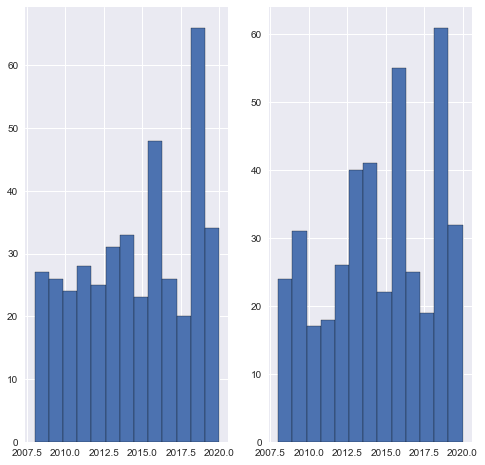

In [117]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(df["YearOfCall"], ec = "black",bins=13)
ax2.hist(dfc["YearOfCall"], ec = "black",bins=13)
plt.show()

---
### Launch Time

There seems to be a strong correlation between the two.

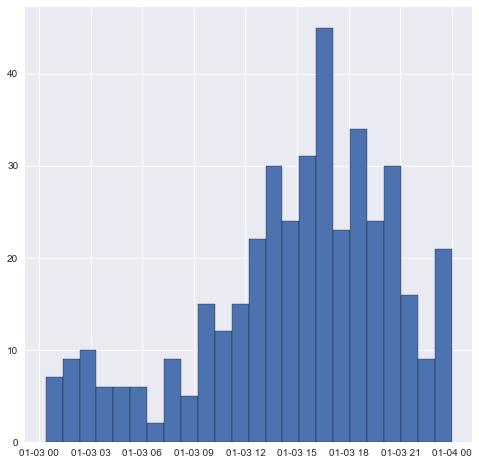

In [118]:
ax = plt.axes()
plt.hist(ltime["LaunchTime"], ec = "black", bins = 24)
plt.show()

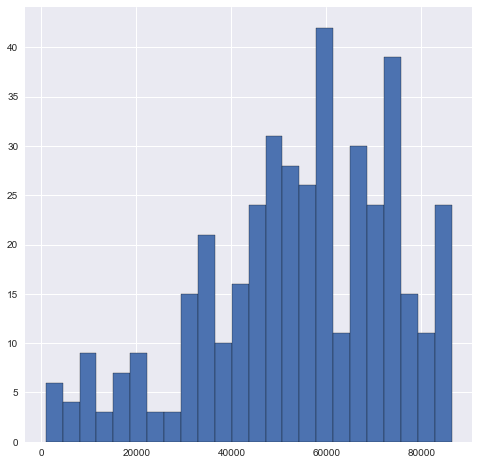

In [119]:
ax = plt.axes()
plt.hist(t, ec = "black", bins = 24)
plt.show()

The value in the following tables match fairly closely in this instance.

In [120]:
m = pd.DataFrame()
m['DateOfLaunch'] = pd.to_datetime(df['DateOfLaunch'], infer_datetime_format=True)
month = df.groupby(m["DateOfLaunch"].dt.month).count()
month["DateOfLaunch"]

DateOfLaunch
1     28
2     23
3     33
4     32
5     39
6     57
7     48
8     47
9     35
10    31
11    18
12    20
Name: DateOfLaunch, dtype: int64

In [121]:
m = pd.DataFrame()
m['DateOfLaunch'] = pd.to_datetime(dfc['DateOfLaunch'], infer_datetime_format=True)
month = dfc.groupby(m["DateOfLaunch"].dt.month).count()
month["DateOfLaunch"]

DateOfLaunch
1     29
2     28
3     27
4     29
5     35
6     67
7     45
8     50
9     31
10    27
11    26
12    17
Name: DateOfLaunch, dtype: int64

---
### Lifeboats

We can see the origianl B-738 added to the earlier entries missing from the original data, the rest looks very similar.

In [122]:
df.groupby(['YearOfCall', 'LifeboatClass', 'LifeboatNumber','RoSType']).size().reset_index(name='counts')

YearOfCall LifeboatClass LifeboatNumber RoSType  counts
0         2010   ATLANTIC 75          B-757     ILB      15
1         2011   ATLANTIC 75          B-757     ILB      23
2         2011   ATLANTIC 85          B-853     ILB       5
3         2012   ATLANTIC 85          B-853     ILB      25
4         2013   ATLANTIC 85          B-853     ILB      31
5         2014   ATLANTIC 85          B-853     ILB      33
6         2015   ATLANTIC 85          B-853     ILB      18
7         2015   ATLANTIC 85          B-865     ILB       5
8         2016   ATLANTIC 85          B-853     ILB      48
9         2017   ATLANTIC 85          B-853     ILB      26
10        2018   ATLANTIC 85          B-853     ILB      20
11        2019   ATLANTIC 85          B-853     ILB      66
12        2020   ATLANTIC 85          B-810     ILB      31
13        2020   ATLANTIC 85          B-853     ILB       3

In [123]:
dfc.groupby(['YearOfCall', 'LifeboatClass', 'LifeboatNumber','RoSType']).size().reset_index(name='counts')

YearOfCall LifeboatClass LifeboatNumber RoSType  counts
0         2008   ATLANTIC 75          B-738     ILB      24
1         2009   ATLANTIC 75          B-738     ILB      31
2         2010   ATLANTIC 75          B-738     ILB       5
3         2010   ATLANTIC 75          B-757     ILB      12
4         2011   ATLANTIC 75          B-757     ILB      13
5         2011   ATLANTIC 85          B-853     ILB       5
6         2012   ATLANTIC 85          B-853     ILB      26
7         2013   ATLANTIC 85          B-853     ILB      40
8         2014   ATLANTIC 85          B-853     ILB      41
9         2015   ATLANTIC 85          B-853     ILB      22
10        2016   ATLANTIC 85          B-853     ILB      55
11        2017   ATLANTIC 85          B-853     ILB      25
12        2018   ATLANTIC 85          B-853     ILB      19
13        2019   ATLANTIC 85          B-853     ILB      61
14        2020   ATLANTIC 85          B-810     ILB      29
15        2020   ATLANTIC 85          B-853     ILB       3

---
### Wind

The two wind roses look like they have a very similar distribution.

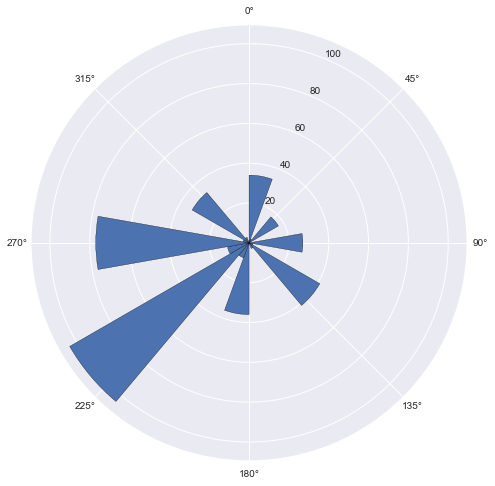

In [124]:
degrees = df["WindDirectionAtLaunch"]
radians = np.deg2rad(degrees)


bin_size = 20
a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='polar')
ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, edgecolor='k')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.show()

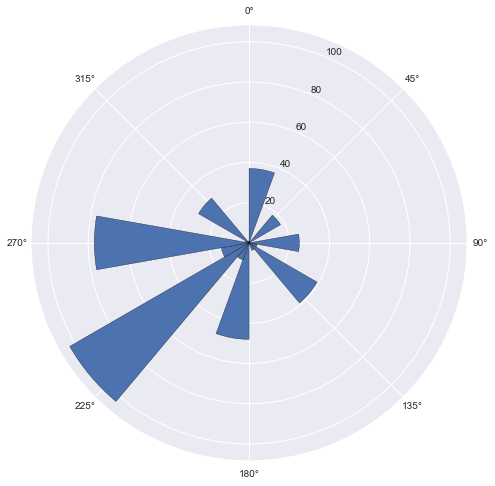

In [125]:
degrees = dfc["WindDirectionAtLaunch"]
radians = np.deg2rad(degrees)


bin_size = 20
a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='polar')
ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, edgecolor='k')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.show()

I also created a fancier windrose that also shows Sea conditions at launch, the top one is the real data and the lower is the simulated data. I have commented out the code and included an image as the interactive plot does not render in github.

In [126]:
# fig = px.bar_polar(df, r="SeaConditionsAtLaunch", theta="WindDirectionAtLaunch",
#                    color="SeaConditionsAtLaunch", template="plotly_dark",
#                    color_discrete_sequence= px.colors.sequential.Plasma_r, 
#                    category_orders = {"SeaConditionsAtLaunch": 
#                                       ['GLASS CALM', 'CALM', 'SMOOTH','SLIGHT', 'MOD/CHOP', 'CHOPPY','ROUGH', 'VERY ROUGH']})
# fig.show()

In [127]:
# fig = px.bar_polar(dfc, r="SeaConditionsAtLaunch", theta="WindDirectionAtLaunch",
#                    color="SeaConditionsAtLaunch", template="plotly_dark",
#                    color_discrete_sequence= px.colors.sequential.Plasma_r, 
#                    category_orders = {"SeaConditionsAtLaunch": 
#                                       ['GLASS CALM', 'CALM', 'SMOOTH','SLIGHT', 'MOD/CHOP', 'CHOPPY','ROUGH', 'VERY ROUGH']})
# fig.show()

![image](./images/wind-conditions.png)

##### Weather at launch original

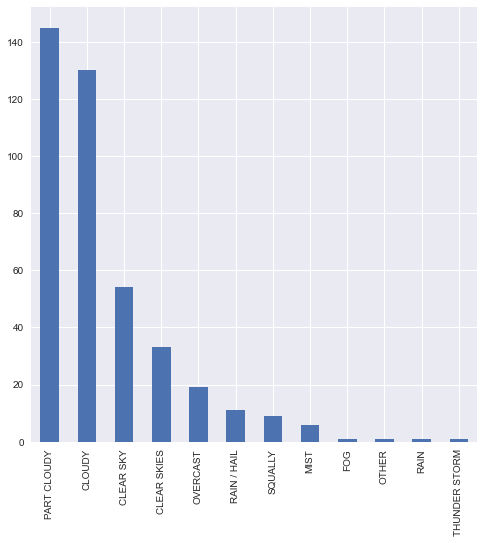

In [128]:
ax1 = df["WeatherAtLaunch"].value_counts().plot(kind = 'bar')

##### Weather at launch simulated

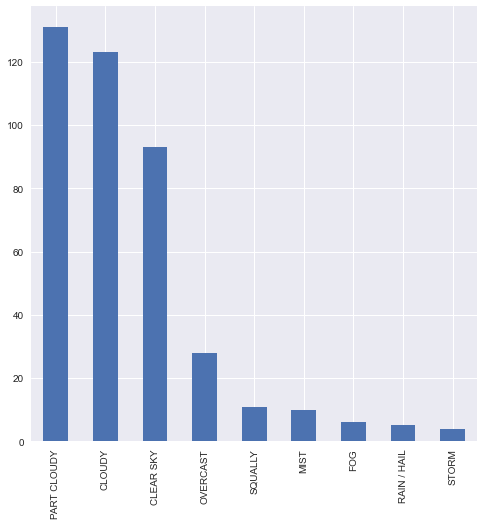

In [129]:
ax2 = dfc["WeatherAtLaunch"].value_counts().plot(kind = 'bar')

##### Visibility At Launch original

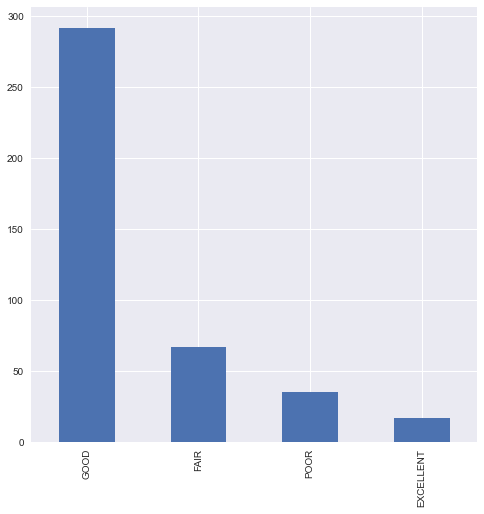

In [130]:
ax = df["VisibilityAtLaunch"].value_counts().plot(kind='bar')

##### Visibility At Launch simulated

<AxesSubplot:>

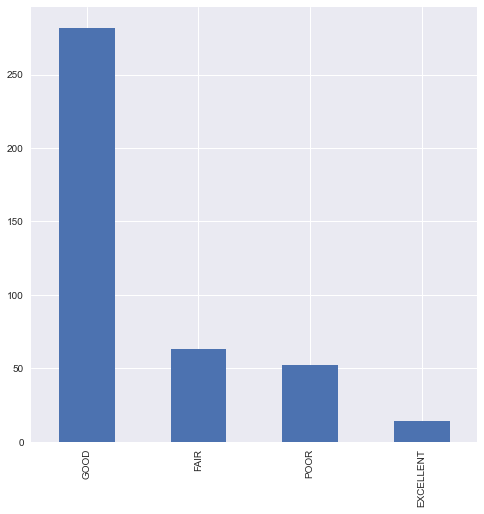

In [131]:
dfc["VisibilityAtLaunch"].value_counts().plot(kind = 'bar')

##### SeaConditions At Launch original

<AxesSubplot:>

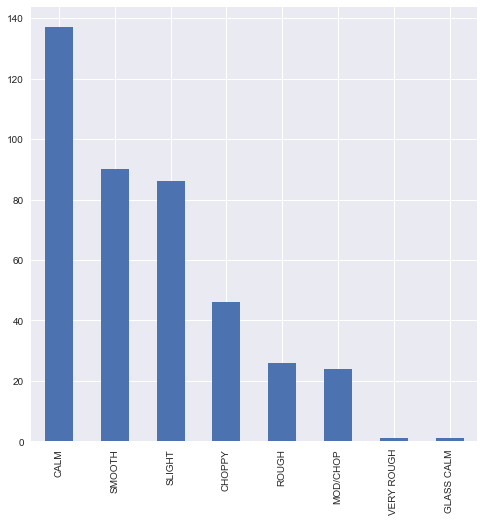

In [132]:
df["SeaConditionsAtLaunch"].value_counts().plot(kind = 'bar')

##### SeaConditions At Launch simulated

<AxesSubplot:>

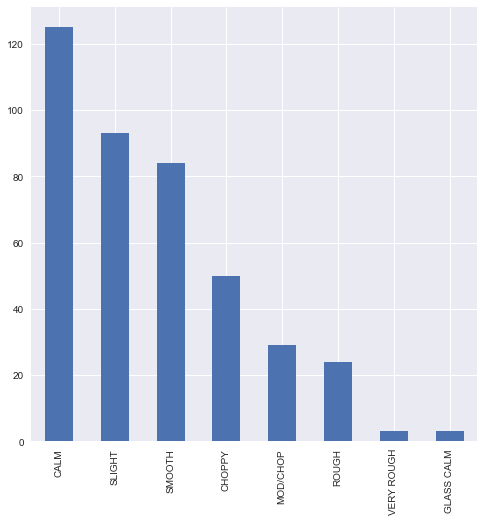

In [133]:
dfc["SeaConditionsAtLaunch"].value_counts().plot(kind = 'bar')

##### Coordinates original

![image](./images/bayreal.png)

##### Coordinates simulated

![image](./images/galwaybay.png)

# Conclusion

Overall I feel the simulated data represents the original fairly accurately, I do feel that more research could be done on the relationships between the variable and also a more sophisticated approach could be required for the map coordiante simulation.

In future I would however chose a real life phenomenon that has more continous data to be able to explore more of the distributions with the NumPy random package. After having investigated this dataset it revealed to contain nearly all discrete data, so the random.choice function may have been over used.

# The Final DataSet

In [134]:
pd.set_option('display.max_rows', 411)
dfc

LifeboatStationNameProper  YearOfCall LaunchTime DateOfLaunch  \
0                      GALWAY        2015   08:50:00   2015-03-15   
1                      GALWAY        2019   11:31:00   2019-06-13   
2                      GALWAY        2013   13:35:00   2013-04-12   
3                      GALWAY        2014   23:10:00   2014-05-15   
4                      GALWAY        2019   19:03:00   2019-02-13   
5                      GALWAY        2019   09:01:00   2019-08-06   
6                      GALWAY        2010   19:45:00   2010-11-29   
7                      GALWAY        2015   16:26:00   2015-07-15   
8                      GALWAY        2016   23:20:00   2016-11-28   
9                      GALWAY        2017   12:57:00   2017-08-10   
10                     GALWAY        2019   20:59:00   2019-02-11   
11                     GALWAY        2016   12:45:00   2016-08-26   
12                     GALWAY        2016   15:19:00   2016-02-14   
13                     GALWAY        2008   16:45:00   2008-08-02   
14                     GALWAY        2009   19:00:00   2009-09-25   
15                     GALWAY        2016   22:24:00   2016-04-21   
16                     GALWAY        2018   20:27:00   2018-01-09   
17                     GALWAY        2009   16:31:00   2009-02-26   
18                     GALWAY        2013   13:13:00   2013-07-13   
19                     GALWAY        2018   05:59:00   2018-06-28   
20                     GALWAY        2016   18:51:00   2016-01-03   
21                     GALWAY        2018   08:54:59   2018-11-10   
22                     GALWAY        2019   13:51:00   2019-06-18   
23                     GALWAY        2008   23:03:00   2008-02-16   
24                     GALWAY        2016   20:37:00   2016-04-14   
25                     GALWAY        2020   18:59:00   2020-05-12   
26                     GALWAY        2016   02:08:00   2016-11-02   
27                     GALWAY        2019   08:46:00   2019-06-27   
28                     GALWAY        2016   22:38:00   2016-09-15   
29                     GALWAY        2008   13:40:00   2008-08-19   
30                     GALWAY        2016   07:22:00   2016-10-23   
31                     GALWAY        2018   05:43:00   2018-08-06   
32                     GALWAY        2014   13:13:00   2014-08-25   
33                     GALWAY        2013   11:06:00   2013-05-02   
34                     GALWAY        2019   13:14:00   2019-05-15   
35                     GALWAY        2010   10:19:00   2010-07-27   
36                     GALWAY        2016   07:05:00   2016-06-06   
37                     GALWAY        2020   08:54:00   2020-08-13   
38                     GALWAY        2017   17:33:00   2017-08-21   
39                     GALWAY        2016   15:55:00   2016-10-01   
40                     GALWAY        2016   15:17:00   2016-08-21   
41                     GALWAY        2012   18:31:00   2012-01-11   
42                     GALWAY        2014   19:49:00   2014-05-12   
43                     GALWAY        2010   13:59:00   2010-06-25   
44                     GALWAY        2020   08:54:00   2020-11-07   
45                     GALWAY        2017   18:26:00   2017-06-13   
46                     GALWAY        2014   11:36:00   2014-01-19   
47                     GALWAY        2009   10:10:00   2009-07-23   
48                     GALWAY        2015   21:55:00   2015-03-01   
49                     GALWAY        2017   03:04:00   2017-06-18   
50                     GALWAY        2020   20:55:00   2020-04-19   
51                     GALWAY        2019   16:06:00   2019-05-02   
52                     GALWAY        2012   10:49:00   2012-07-21   
53                     GALWAY        2009   18:53:00   2009-05-18   
54                     GALWAY        2016   23:41:00   2016-08-21   
55                     GALWAY        2012   15:39:00   2012-03-18   
56                     GALWAY        2017   22:22:00   2017-03-18   
57

1. https://data-rnli.opendata.arcgis.com/datasets/rnli-returns-of-service/explore
2. https://www.irishlifeboats.com/atlantic-75-class-lifeboats
3. https://stackoverflow.com/questions/48769599/how-do-i-plot-a-standard-histogram-data-to-a-polar-histogram-using-python-and-py